问：一年里，太阳直射哪个纬度？那个时候在某个纬度爬上10米的杆子，可以早多久看到太阳的温暖？

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [416]:
def plot_line(ax, xs, ys, zs, color = 'black', linestyle = 'solid'):
    ax.plot(xs, ys, zs, color = color, linestyle = linestyle)

def plot_between_two_points(ax, first, second, color = 'black', linestyle = 'solid'):
    xs, ys, zs = (np.linspace(first[i], second[i], 100) for i in range(3))
    plot_line(ax, xs, ys, zs, color, linestyle)
    
def plot_coordinate(ax):
    line = np.linspace(0, 3, 100)
    zeros = np.zeros(len(line))
    plot_line(ax, line, zeros, zeros)
    plot_line(ax, zeros, line, zeros)
    plot_line(ax, zeros, zeros, line)
    ax.text(3.5, 0, 0, 'x')
    ax.text(.3, 3.3, 0, 'y')
    ax.text(0, 0, 3.3, 'z')

the_angle = np.pi / 2 - (23 + 26 / 60) / 180 * np.pi
earth_R = 6.371e6
def plot_the_triangle(ax, point):
    ax.text(point[0], point[1] + 0.2, point[2] + 0.1, '\u03B8', color = 'red')
    second_point = (point[0], point[1] + 0.8, point[2])
    third_point = (point[0], point[1] + 0.8, point[2] + 0.8 * np.tan(the_angle))
    plot_between_two_points(ax, point, second_point, linestyle = 'dashed')
    plot_between_two_points(ax, point, third_point, linestyle = 'dashed')
    plot_between_two_points(ax, second_point, third_point, linestyle = 'dashed')
    

Text(-0.2,0.3,'ψ')

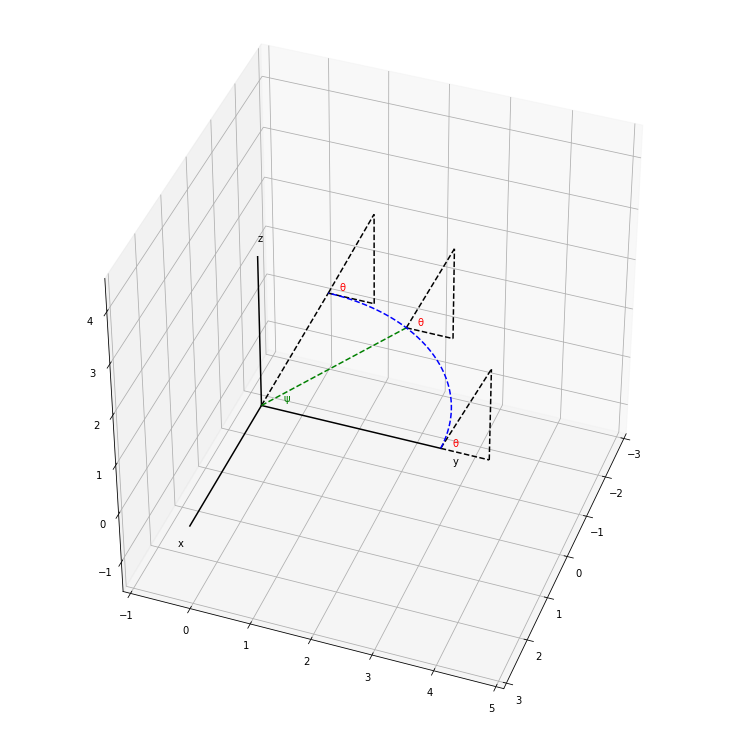

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev = 40., azim = 20)
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-1, 5)
ax.set_zlim(-1.5, 4.5)
plot_coordinate(ax)
plot_line(ax, -np.linspace(0, 3, 100), np.zeros(100), np.zeros(100), linestyle = 'dashed')

plot_the_triangle(ax, (0, 3, 0))
plot_the_triangle(ax, (-3, 0, 0))

mid_angle = np.pi / 2 + np.pi / 3
mid_point = (3 * np.cos(mid_angle), 3 * np.sin(mid_angle), 0)
plot_between_two_points(ax, (0, 0, 0), mid_point, color = 'green', linestyle = 'dashed')
plot_the_triangle(ax, mid_point)

angles = np.linspace(np.pi / 2, np.pi, 100)
xs = np.cos(angles) * 3
ys = np.sin(angles) * 3
ax.plot(xs, ys, 0, color = 'blue', linestyle = 'dashed')
ax.text(-.2, .3, 0, '\u03C8', color = 'green')

In [493]:
from sympy import Symbol
import sympy
from sympy import Matrix
from sympy import lambdify, solve, Eq, cos, sin, tan, asin, acos, simplify, sqrt, atan

In [8]:
psi = Symbol('psi')
theta = Symbol('theta')
sun_earth_dir = Matrix([sympy.cos(psi), sympy.sin(psi), 0])
earth_rotate_dir = Matrix([0, sympy.cos(theta), sympy.sin(theta)])
def get_latitude():
    return sympy.pi / 2 - sympy.acos(sun_earth_dir.dot(earth_rotate_dir))

In [451]:
func = lambdify([psi, theta], get_latitude())

In [465]:
beta_val = -func(148 / 365 * np.pi * 2 + np.pi / 2, the_angle) 

In [466]:
beta_val

0.33586582412377264

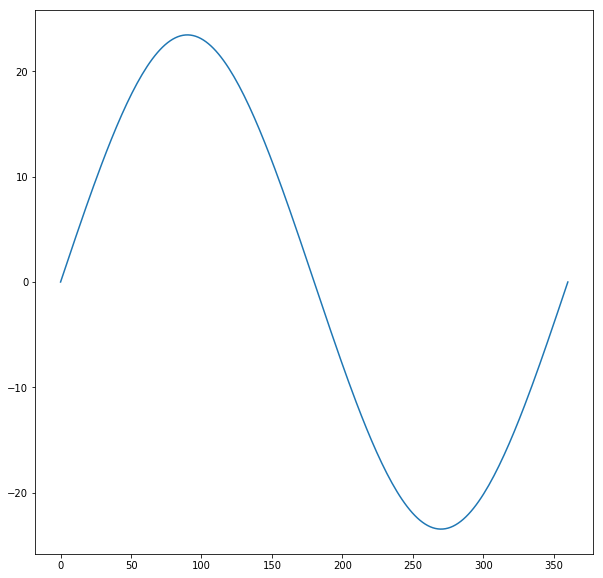

In [453]:
angles = np.linspace(0, np.pi * 2, 200)
plt.plot(angles / np.pi * 180, func(angles, the_angle) / np.pi * 180)

太阳直射在纬度$beta$（南半球为正，北半球为负，范围是0到$\frac \pi 2$，阳光切纬度$\alpha$的一点$B$（$B$点的角度为$\phi$），照在纬度$\gamma$的杆子$C$点上，那么这个杆子的高度与地球半径的比是多少？

In [69]:
alpha, beta, gamma, phi, t = [Symbol(t) for t in ['alpha', 'beta', 'gamma', 'phi', 't']]
def z_rotate(angle, vector):
    return Matrix([
        [cos(angle), -sin(angle), 0],
        [sin(angle), cos(angle), 0],
        [0, 0, 1]
    ]) * vector

def y_rotate(angle, vector):
    return Matrix([
        [cos(angle), 0, sin(angle)],
        [0, 1, 0],
        [-sin(angle), 0, cos(angle)]
    ]) * vector

In [70]:
sun_direction = Matrix([0, -cos(beta), sin(beta)])
B_coordinate = z_rotate(phi, y_rotate(alpha, Matrix([1, 0, 0])))

太阳直射方向切$B$点，故 $- \sin{(\alpha )} \sin{(\beta )} - \sin{(\phi )} \cos{(\alpha )} \cos{(\beta )} = 0$

In [71]:
B_coordinate = B_coordinate.subs({phi: -asin(sin(alpha) * sin(beta) / cos(alpha) / cos(beta))})

In [183]:
def get_rotate_angle_of_sun_rise(alpha_val, beta_val):
    return (-asin(sin(alpha) * sin(beta) / cos(alpha) / cos(beta))).subs({alpha: alpha_val, beta: beta_val})

In [72]:
C_coordinate = B_coordinate + t * sun_direction

In [73]:
c_list = list(C_coordinate)

In [74]:
eq = tan(gamma) ** 2 * (c_list[0] ** 2 + c_list[1] ** 2) - c_list[2] ** 2

In [141]:
a = eq.expand().coeff(t ** 2)

In [142]:
b = eq.expand().coeff(t)

In [143]:
c = simplify(eq.expand() - t ** 2 * a - t * b)

In [80]:
root_verify = simplify(cos(gamma) ** 4 * (b ** 2 / 4 - a * c))

In [98]:
new_result0 = simplify((-b / 2 * cos(gamma) ** 2 + sqrt(root_verify)) / (a * cos(gamma) ** 2))
new_result1 = simplify((-b / 2 * cos(gamma) ** 2 - sqrt(root_verify)) / (a * cos(gamma) ** 2))

In [501]:
def solve_the_function_and_get_ratio(alpha_val, beta_val, gamma_val):
    feed_dict = {alpha: alpha_val, beta: beta_val, gamma: gamma_val}
    t_dict = {}
    if np.abs(a.subs(feed_dict)) < 1e-16:
        t_val = -c.subs(feed_dict) / b.subs(feed_dict)
        if t_val <= 0:
            return [], None
        else:
            t_dict = {t: t_val}
    else:
        if root_verify.subs(feed_dict) < 0:
            return [], None
        else:
            t_val0, t_val1 = new_result0.subs(feed_dict), new_result1.subs(feed_dict)
            t_val0, t_val1 = min(t_val0, t_val1), max(t_val0, t_val1)
            if t_val1 < 0: return[], None
            if t_val0 > 0:
                t_dict = {t: t_val0}
            else:
                t_dict = {t: t_val1}
            
    t_dict.update(feed_dict)
    C_coordinate_val = C_coordinate.subs(t_dict)
    return [sqrt(C_coordinate_val.dot(C_coordinate_val))], t_dict[t]

In [541]:
def get_time_diff(beta_val, gamma_val, stick_length):
    if beta_val == 0 and gamma_val == 0:
        return acos(earth_R / (earth_R + stick_length)) / np.pi / 2 * 24 * 3600
    # beta_val is latitude of direct sun, gamma_val is the latitude to climb the stick
    assert the_angle - np.pi / 2 <= beta_val <= np.pi / 2 - the_angle
    assert np.abs(gamma_val) <= np.pi / 2 - np.abs(beta_val)
    assert stick_length > 0
    search_bounds = (-np.abs(np.pi / 2 - np.abs(beta_val)), np.abs(np.pi / 2 - np.abs(beta_val)))
    search_point0 = gamma_val
    search_point1 = (search_bounds[1] if gamma_val > 0 else search_bounds[0]) if beta_val == 0 else (search_bounds[1] if beta_val > 0 else search_bounds[0])
    search_points = (search_point0, search_point1)
    desired_ratio = (earth_R + stick_length) / earth_R
    print(desired_ratio, beta_val / np.pi * 180, gamma_val / np.pi * 180)
    for round in range(28):
        alpha_val = 0.5 * search_points[0] + 0.5 * search_points[1]
        ratio, t_the_val = solve_the_function_and_get_ratio(alpha_val, beta_val, gamma_val)
        #print(ratio, search_points, (ratio[0] - 1) * earth_R if len(ratio) > 0 else 0)
        if len(ratio) < 1 or ratio[0] > desired_ratio:
            search_points = (search_points[0], alpha_val)
        else:
            search_points = (alpha_val, search_points[1])

    x_cor = c_list[0].subs({beta: beta_val, alpha: search_points[0]})
    y_cor = c_list[1].subs({beta: beta_val, alpha: search_points[0], t: t_the_val})
    #print(C_coordinate.subs({beta: beta_val, alpha: search_points[0], t: t_the_val}))
    
    return np.abs((get_rotate_angle_of_sun_rise(gamma_val, beta_val) - atan(y_cor / x_cor)) / 2 / np.pi * 24 * 3600)

In [523]:
C_coordinate

Matrix([
[sqrt(-sin(alpha)**2*sin(beta)**2/(cos(alpha)**2*cos(beta)**2) + 1)*cos(alpha)],
[                                -t*cos(beta) - sin(alpha)*sin(beta)/cos(beta)],
[                                                     t*sin(beta) - sin(alpha)]])

In [544]:
#beta_val = -np.pi / 2 + the_angle
beta_val = np.pi / 1000
gamma_val = -35.6 / 180 * np.pi
#gamma_val = 0
get_time_diff(beta_val, gamma_val, 10)

1.0000015696123057 0.18 -35.6


29.9281540548361

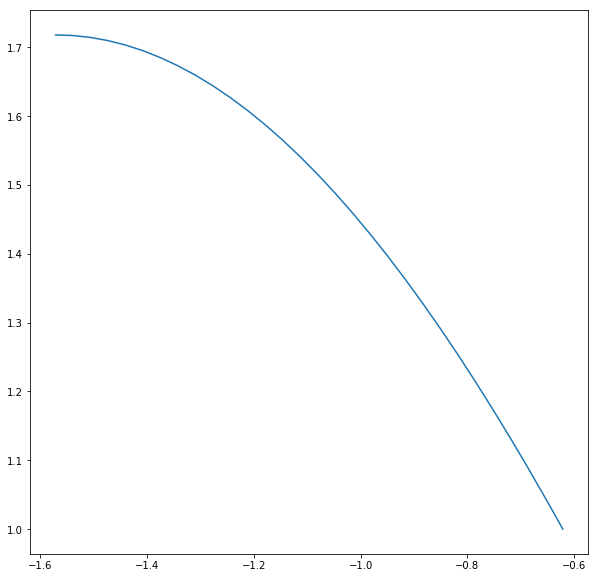

In [540]:
search_bounds = (-np.abs(np.pi / 2 - np.abs(beta_val)), np.abs(np.pi / 2 - np.abs(beta_val)))
search_point0 = gamma_val
search_point1 = (search_bounds[1] if gamma_val > 0 else search_bounds[0]) if beta_val == 0 else (search_bounds[1] if beta_val > 0 else search_bounds[0])
search_points = (search_point0, search_point1)
search_range = np.linspace(search_point0, search_point1, 30)
ratio_arr = []
alpha_arr = []
for alpha_val in search_range:
    tmp = solve_the_function_and_get_ratio(alpha_val, beta_val, gamma_val)
    if len(tmp) > 0:
        alpha_arr.append(alpha_val)
        ratio_arr.append(tmp[0])
plt.plot(alpha_arr, ratio_arr)

In [469]:
import datetime
import pandas as pd
gamma_val

-0.6213372137099813

In [442]:
datetime.datetime.now().date() - pd.to_datetime('2019-06-23').date()

datetime.timedelta(88)

In [471]:
sun_angles = np.linspace(0, np.pi * 2, 365)

In [483]:
gamma_vals = np.linspace(-the_angle + np.pi / 90, the_angle - np.pi / 90, 100)

In [472]:
beta_vals = -func(sun_angles, the_angle)

In [485]:
gamma_vals[-5:]

array([1.03583822, 1.05860389, 1.08136957, 1.10413525, 1.12690092])

In [535]:
time_diffs = [get_time_diff(bv, gamma_val, 10) for bv in beta_vals]

1.0000015696123057 -0.0 -35.6
[1.52788400198497] (-0.6213372137099813, -1.5707963267948966) 3363148.97664625
[1.30040402880377] (-0.6213372137099813, -1.096066770252439) 1913874.06750882
[1.15835042104854] (-0.6213372137099813, -0.8587019919812101) 1008850.53250025
[1.08107809399755] (-0.6213372137099813, -0.7400196028455956) 516548.536858416
[1.04099723139593] (-0.6213372137099813, -0.6806784082777885) 261193.361223438
[1.02061092476991] (-0.6213372137099813, -0.6510078109938848) 131312.201709104
[1.01033325729401] (-0.6213372137099813, -0.6361725123519331) 65833.1822201067
[1.00517354191128] (-0.6213372137099813, -0.6287548630309572) 32960.6355167490
[1.00258849482841] (-0.6213372137099813, -0.6250460383704692) 16491.3005517764
[1.00129467782633] (-0.6213372137099813, -0.6231916260402253) 8248.39243156876
[1.00064744644665] (-0.6213372137099813, -0.6222644198751033) 4124.88131161240
[1.00032375009800] (-0.6213372137099813, -0.6218008167925423) 2062.61187436230
[1.00016188176658] (-0.

[1.00000157156018] (-0.621383166786125, -0.621383277516429) 10.0124099109697
[1.00000156971471] (-0.621383166786125, -0.621383222151277) 10.0006523904836
[1.00000156879236] (-0.621383166786125, -0.6213831944687009) 9.99477609879817
[1.00000156925350] (-0.621383180627413, -0.6213831944687009) 9.99771403880989
[1.00000156948409] (-0.621383187548057, -0.6213831944687009) 9.99918316301218
1.0000015696123057 -1.5721940413240845 -35.6
[1.46641575962169] (-0.6213372137099813, -1.5433563642935555) 2971534.80454979
[1.25679333072630] (-0.6213372137099813, -1.0823467890017684) 1636030.31005729
[1.12926552625790] (-0.6213372137099813, -0.8518420013558748) 823550.667789066
[1.06194283630696] (-0.6213372137099813, -0.7365896075329281) 394637.810111662
[1.02849385216163] (-0.6213372137099813, -0.6789634106214547) 181534.332121773
[1.01253301226322] (-0.6213372137099813, -0.650150312165718) 79847.8211289542
[1.00521546195955] (-0.6213372137099813, -0.6357437629378496) 33227.7081443095
[1.002023994042

[1.00000157454044] (-0.6214421023120602, -0.6214438217973401) 10.0313971179691
[1.00000156189974] (-0.6214421023120602, -0.6214429620547002) 9.95086325053673
[1.00000156821385] (-0.6214425321833802, -0.6214429620547002) 9.99109047018343
[1.00000157137559] (-0.6214427471190402, -0.6214429620547002) 10.0112338660894
[1.00000156979433] (-0.6214427471190402, -0.6214428545868702) 10.0011596854324
[1.00000156900400] (-0.6214427471190402, -0.6214428008529552) 9.99612445748554
[1.00000156939914] (-0.6214427739859978, -0.6214428008529552) 9.99864191655520
[1.00000156959673] (-0.6214427874194766, -0.6214428008529552) 9.99990076350565
[1.00000156969553] (-0.621442794136216, -0.6214428008529552) 10.0005302145665
1.0000015696123057 -3.1380708737299328 -35.6
[1.41205834188380] (-0.6213372137099813, -1.516026657887374) 2625223.69614169
[1.21930719120391] (-0.6213372137099813, -1.0686819357986777) 1397206.11516010
[1.10535031541501] (-0.6213372137099813, -0.8450095747543295) 671186.859509057
[1.047253

[1.00001032417115] (-0.6213372137099813, -0.6221910525400327) 65.7752944050682
[1.00000262633399] (-0.6213372137099813, -0.621764133125007) 16.7323738280596
[1.00000066243116] (-0.6213372137099813, -0.6215506734174941) 4.22034891281342
[1.00000148385550] (-0.6214439435637378, -0.6215506734174941) 9.45364337087651
[1.00000201522745] (-0.6214973084906159, -0.6215506734174941) 12.8390140628905
[1.00000173954181] (-0.6214973084906159, -0.6215239909540551) 11.0826208951185
[1.00000160919462] (-0.6214973084906159, -0.6215106497223355) 10.2521789042169
[1.00000154589853] (-0.6214973084906159, -0.6215039791064757) 9.84891953935407
[1.00000157739001] (-0.6215006437985457, -0.6215039791064757) 10.0495517335457
[1.00000156160512] (-0.6215006437985457, -0.6215023114525107) 9.94898621310902
[1.00000156948778] (-0.6215014776255282, -0.6215023114525107) 9.99920662350440
[1.00000157343645] (-0.6215018945390194, -0.6215023114525107) 10.0243635919535
[1.00000157146150] (-0.6215018945390194, -0.621502102

[1.16635611720487] (-0.6213372137099813, -1.0450673483695985) 1059854.82271220
[1.07370138642889] (-0.6213372137099813, -0.8332022810397899) 469551.532938470
[1.02964213210699] (-0.6213372137099813, -0.7272697473748856) 188850.023653658
[1.01082719086489] (-0.6213372137099813, -0.6743034805424335) 68980.0330002187
[1.00358437020019] (-0.6213372137099813, -0.6478203471262074) 22836.0225454196
[1.00108300493037] (-0.6213372137099813, -0.6345787804180943) 6899.82441136924
[1.00030413530620] (-0.6213372137099813, -0.6279579970640379) 1937.64603578955
[1.00008121934520] (-0.6213372137099813, -0.6246476053870096) 517.448448260718
[1.00002103748813] (-0.6213372137099813, -0.6229924095484954) 134.029836900167
[1.00000535715760] (-0.6213372137099813, -0.6221648116292384) 34.1304510411302
[1.00000135193519] (-0.6213372137099813, -0.6217510126696099) 8.61317907439330
[1.00000302754588] (-0.6215441131897956, -0.6217510126696099) 19.2884948156051
[1.00000210741624] (-0.6215441131897956, -0.62164756

[1.14222535359483] (-0.6213372137099813, -1.0318395747257985) 906117.727752646
[1.06028105688023] (-0.6213372137099813, -0.8265883942178899) 384050.613383925
[1.02293018909438] (-0.6213372137099813, -0.7239628039639356) 146088.234720274
[1.00785942132150] (-0.6213372137099813, -0.6726500088369585) 50072.3732392509
[1.00244323206072] (-0.6213372137099813, -0.6469936112734699) 15565.8314588270
[1.00070046364088] (-0.6213372137099813, -0.6341654124917255) 4462.65385601571
[1.00018954991009] (-0.6213372137099813, -0.6277513131008534) 1207.62247715873
[1.00004947432200] (-0.6213372137099813, -0.6245442634054174) 315.200905476701
[1.00001265084006] (-0.6213372137099813, -0.6229407385576993) 80.5985020178184
[1.00000319947621] (-0.6213372137099813, -0.6221389761338403) 20.3838629450337
[1.00000080456270] (-0.6213372137099813, -0.6217380949219108) 5.12586897879430
[1.00000180496701] (-0.6215376543159461, -0.6217380949219108) 11.4994448226169
[1.00000125528600] (-0.6215376543159461, -0.62163787

[1.00000156992276] (-0.6216595878775524, -0.6216596834241344) 10.0019778927327
[1.00000156969099] (-0.6216595878775524, -0.6216596356508434) 10.0005012751496
[1.00000156957511] (-0.6216595878775524, -0.6216596117641979) 9.99976300526084
[1.00000156963305] (-0.6216595998208752, -0.6216596117641979) 10.0001321359613
[1.00000156960408] (-0.6216595998208752, -0.6216596057925365) 9.99994756848910
1.0000015696123057 -8.84548509197269 -35.6
[1.26020506624036] (-0.6213372137099813, -1.4164134880038997) 1657766.47701735
[1.12182311942294] (-0.6213372137099813, -1.0188753508569404) 776135.093843569
[1.04951036322162] (-0.6213372137099813, -0.8201062822834608) 315430.524084944
[1.01791778700332] (-0.6213372137099813, -0.7207217479967211) 114154.220998172
[1.00582918219993] (-0.6213372137099813, -0.6710294808533512) 37137.7197957222
[1.00173000025741] (-0.6213372137099813, -0.6461833472816663) 11021.8316399852
[1.00047909005950] (-0.6213372137099813, -0.6337602804958238) 3052.28276907293
[1.000126

[1.00000157196058] (-0.6217131808717918, -0.6217161412431447) 10.0149608688609
[1.00000156582116] (-0.6217131808717918, -0.6217146610574682) 9.97584663341189
[1.00000156888938] (-0.6217139209646301, -0.6217146610574682) 9.99539424259210
[1.00000157042461] (-0.6217142910110491, -0.6217146610574682) 10.0051751798282
[1.00000156965690] (-0.6217142910110491, -0.6217144760342587) 10.0002841170588
[1.00000156927312] (-0.6217142910110491, -0.621714383522654) 9.99783903128759
[1.00000156946500] (-0.6217143372668515, -0.621714383522654) 9.99906153739238
[1.00000156956095] (-0.6217143603947528, -0.621714383522654) 9.99967281732306
[1.00000156960893] (-0.6217143719587034, -0.621714383522654) 9.99997846577627
[1.00000156963291] (-0.6217143777406786, -0.621714383522654) 10.0001312900029
1.0000015696123057 -10.294420801190814 -35.6
[1.23092905696158] (-0.6213372137099813, -1.3911247892283243) 1471249.02190221
[1.10463037806812] (-0.6213372137099813, -1.006231001469153) 666600.138671972
[1.0408883790

[1.00000156782031] (-0.6217613841461956, -0.6217728482120393) 9.98858318524909
[1.00000158873582] (-0.6217671161791174, -0.6217728482120393) 10.1218358993993
[1.00000157826084] (-0.6217671161791174, -0.6217699821955783) 10.0550997848785
[1.00000157303627] (-0.6217671161791174, -0.6217685491873479) 10.0218140444646
[1.00000157042721] (-0.6217671161791174, -0.6217678326832327) 10.0051917566522
[1.00000156912349] (-0.6217671161791174, -0.621767474431175) 9.99688575498481
[1.00000156977528] (-0.6217672953051462, -0.621767474431175) 10.0010383271807
[1.00000156944937] (-0.6217672953051462, -0.6217673848681606) 9.99896193356964
[1.00000156961232] (-0.6217673400866535, -0.6217673848681606) 10.0000001027896
[1.00000156953084] (-0.6217673400866535, -0.621767362477407) 9.99948101110637
[1.00000156957158] (-0.6217673512820303, -0.621767362477407) 9.99974055624064
[1.00000156959195] (-0.6217673568797186, -0.621767362477407) 9.99987032880778
1.0000015696123057 -11.70021039857481 -35.6
[1.2054165010

[1.00001355628840] (-0.6213372137099813, -0.624178669913781) 86.3671134151200
[1.00000341402424] (-0.6213372137099813, -0.6227579418118812) 21.7507484187551
[1.00000085666472] (-0.6213372137099813, -0.6220475777609312) 5.45781093426978
[1.00000192393461] (-0.6216923957354563, -0.6220475777609312) 12.2573873781266
[1.00000133730085] (-0.6216923957354563, -0.6218699867481938) 8.51994372844644
[1.00000161738637] (-0.6217811912418251, -0.6218699867481938) 10.3043685487754
[1.00000147403348] (-0.6217811912418251, -0.6218255889950095) 9.39106729929806
[1.00000154488268] (-0.6218033901184172, -0.6218255889950095) 9.84244753874841
[1.00000158092775] (-0.6218144895567134, -0.6218255889950095) 10.0720906757283
[1.00000156285351] (-0.6218144895567134, -0.6218200392758615) 9.95693973587608
[1.00000157187771] (-0.6218172644162874, -0.6218200392758615) 10.0144328677361
[1.00000156736238] (-0.6218172644162874, -0.6218186518460744) 9.98566571658221
[1.00000156961924] (-0.6218179581311809, -0.621818651

[1.00001051125292] (-0.6213372137099813, -0.6240890450801782) 66.9671923650488
[1.00000264352241] (-0.6213372137099813, -0.6227131293950797) 16.8418812576696
[1.00000066286414] (-0.6213372137099813, -0.6220251715525305) 4.22310744881149
[1.00000148920907] (-0.6216811926312559, -0.6220251715525305) 9.48775099667087
[1.00000202546165] (-0.6218531820918931, -0.6220251715525305) 12.9042161803645
[1.00000174709787] (-0.6218531820918931, -0.6219391768222118) 11.1307605194264
[1.00000161559266] (-0.6218531820918931, -0.6218961794570524) 10.2929408403138
[1.00000155176048] (-0.6218531820918931, -0.6218746807744728) 9.88626604567089
[1.00000158351650] (-0.621863931433183, -0.6218746807744728) 10.0885836181968
[1.00000156759847] (-0.621863931433183, -0.6218693061038278) 9.98716985893600
[1.00000157554748] (-0.6218666187685054, -0.6218693061038278) 10.0378129967316
[1.00000157157047] (-0.6218666187685054, -0.6218679624361666) 10.0124754911373
[1.00000156958385] (-0.6218666187685054, -0.6218672906

[1.15134300616676] (-0.6213372137099813, -1.3039281431120406) 964206.292288453
[1.06144659086657] (-0.6213372137099813, -0.962632678411011) 391476.230410903
[1.02133047085970] (-0.6213372137099813, -0.7919849460604962) 135896.429847163
[1.00658551100319] (-0.6213372137099813, -0.7066610798852387) 41956.2906013294
[1.00186733468676] (-0.6213372137099813, -0.6639991467976101) 11896.7892893744
[1.00050083363750] (-0.6213372137099813, -0.6426681802537957) 3190.81110451588
[1.00012998344874] (-0.6213372137099813, -0.6320026969818885) 828.124551938390
[1.00003313098180] (-0.6213372137099813, -0.626669955345935) 211.077485055017
[1.00000836472755] (-0.6213372137099813, -0.6240035845279581) 53.2916792037408
[1.00000210159859] (-0.6213372137099813, -0.6226703991189697) 13.3892846369690
[1.00000052671252] (-0.6213372137099813, -0.6220038064144755) 3.35568548358856
[1.00000118362415] (-0.6216705100622284, -0.6220038064144755) 7.54086948951782
[1.00000161003951] (-0.621837158238352, -0.62200380641

[1.00000156880286] (-0.6219455986280524, -0.6219459166546694) 9.99484301439169
[1.00000156921197] (-0.621945757641361, -0.6219459166546694) 9.99744946743775
[1.00000156941655] (-0.6219458371480151, -0.6219459166546694) 9.99875281915696
[1.00000156951884] (-0.6219458769013422, -0.6219459166546694) 9.99940452684611
[1.00000156956999] (-0.6219458967780058, -0.6219459166546694) 9.99973038917856
[1.00000156959556] (-0.6219459067163375, -0.6219459166546694) 9.99989332246676
[1.00000156960835] (-0.6219459116855035, -0.6219459166546694) 9.99997478911085
1.0000015696123057 -16.4763743822443 -35.6
[1.13649620647595] (-0.6213372137099813, -1.2832293450334868) 869617.331458268
[1.05406084287024] (-0.6213372137099813, -0.9522832793717341) 344421.629926291
[1.01832154407366] (-0.6213372137099813, -0.7868102465408577) 116726.557293280
[1.00554254663447] (-0.6213372137099813, -0.7040737301254195) 35311.5646081975
[1.00154874383877] (-0.6213372137099813, -0.6627054719177004) 9867.04699683490
[1.0004115

[1.00000231754247] (-0.6219692537557979, -0.6222852737787063) 14.7650630900817
[1.00000187810340] (-0.6219692537557979, -0.6221272637672521) 11.9653967353659
[1.00000167562087] (-0.6219692537557979, -0.622048258761525) 10.6753805702022
[1.00000157869245] (-0.6219692537557979, -0.6220087562586615) 10.0578496179733
[1.00000153130690] (-0.6219692537557979, -0.6219890050072296) 9.75595628503845
[1.00000155490978] (-0.6219791293815138, -0.6219890050072296) 9.90633018743936
[1.00000156677864] (-0.6219840671943717, -0.6219890050072296) 9.98194671646413
[1.00000157272993] (-0.6219865361008007, -0.6219890050072296) 10.0198623717191
[1.00000156975288] (-0.6219865361008007, -0.6219877705540151) 10.0008955950399
[1.00000156826541] (-0.6219865361008007, -0.621987153327408) 9.99141891990374
[1.00000156900906] (-0.6219868447141044, -0.621987153327408) 9.99615670010123
[1.00000156938095] (-0.6219869990207562, -0.621987153327408) 9.99852600752060
[1.00000156956691] (-0.621987076174082, -0.6219871533274

[1.00000125093957] (-0.6213372137099813, -0.622565418081953) 7.96973601558548
[1.00000280990262] (-0.6219513158959671, -0.622565418081953) 17.9018896056298
[1.00000195295573] (-0.6219513158959671, -0.6222583669889601) 12.4422809743632
[1.00000158255698] (-0.6219513158959671, -0.6221048414424636) 10.0824705048386
[1.00000141189756] (-0.6219513158959671, -0.6220280786692154) 8.99519935461668
[1.00000149601497] (-0.6219896972825912, -0.6220280786692154) 9.53111138033114
[1.00000153898295] (-0.6220088879759034, -0.6220280786692154) 9.80486035867734
[1.00000156069421] (-0.6220184833225594, -0.6220280786692154) 9.94318282379969
[1.00000157160666] (-0.6220232809958874, -0.6220280786692154) 10.0127060176345
[1.00000156614570] (-0.6220232809958874, -0.6220256798325514) 9.97791425763128
[1.00000156887500] (-0.6220244804142194, -0.6220256798325514) 9.99530259615411
[1.00000157024053] (-0.6220250801233854, -0.6220256798325514) 10.0040024225856
[1.00000156955769] (-0.6220250801233854, -0.6220253799

[1.10579956836239] (-0.6213372137099813, -1.233288828243404) 674049.050036780
[1.03957249610392] (-0.6213372137099813, -0.9273130209766927) 252116.372678095
[1.01273722770196] (-0.6213372137099813, -0.774325117343337) 81148.8776891628
[1.00369994000091] (-0.6213372137099813, -0.6978311655266591) 23572.3177457800
[1.00100591979921] (-0.6213372137099813, -0.6595841896183202) 6408.71504075593
[1.00026298851849] (-0.6213372137099813, -0.6404607016641508) 1675.49985131354
[1.00006728868211] (-0.6213372137099813, -0.630898957687066) 428.696193708879
[1.00001702190793] (-0.6213372137099813, -0.6261180856985237) 108.446575443698
[1.00000428090540] (-0.6213372137099813, -0.6237276497042525) 27.2736483101219
[1.00000107343442] (-0.6213372137099813, -0.6225324317071169) 6.83885071115475
[1.00000241161279] (-0.621934822708549, -0.6225324317071169) 15.3643850703693
[1.00000167598522] (-0.621934822708549, -0.622233627207833) 10.6777018546278
[1.00000135805654] (-0.621934822708549, -0.622084224958191

[1.09767839416347] (-0.6213372137099813, -1.217981209984132) 622309.049215499
[1.03592878456730] (-0.6213372137099813, -0.9196592118470567) 228902.286478244
[1.01140236399289] (-0.6213372137099813, -0.7704982127785189) 72644.4609986921
[1.00327794825456] (-0.6213372137099813, -0.6959177132442501) 20883.8083297902
[1.00088528774854] (-0.6213372137099813, -0.6586274634771156) 5640.16824594210
[1.00023056550360] (-0.6213372137099813, -0.6399823385935485) 1468.93282343638
[1.00005887097089] (-0.6213372137099813, -0.6306597761517649) 375.066955552719
[1.00001487646712] (-0.6213372137099813, -0.6259984949308731) 94.7779720070603
[1.00000373928479] (-0.6213372137099813, -0.6236678543204273) 23.8229833788748
[1.00000093736310] (-0.6213372137099813, -0.6225025340152043) 5.97194032867310
[1.00000210620339] (-0.6219198738625928, -0.6225025340152043) 13.4186217816048
[1.00000146363486] (-0.6219198738625928, -0.6222112039388985) 9.32481767735394
[1.00000177039683] (-0.6220655389007457, -0.622211203

[1.00000156963608] (-0.622112685879295, -0.6221127208230661) 10.0001514939796
[1.00000156960078] (-0.622112685879295, -0.6221127033511806) 9.99992657938376
[1.00000156961843] (-0.6221126946152378, -0.6221127033511806) 10.0000390366817
[1.00000156960961] (-0.6221126946152378, -0.6221126989832092) 9.99998280732539
1.0000015696123057 -20.99576095463217 -35.6
[1.09090238990295] (-0.6213372137099813, -1.2043511691748974) 579139.126071669
[1.03295312561808] (-0.6213372137099813, -0.9128441914424393) 209944.363312794
[1.01033387534808] (-0.6213372137099813, -0.7670907025762104) 65837.1198426187
[1.00294545250324] (-0.6213372137099813, -0.6942139581430958) 18765.4778981432
[1.00079123091597] (-0.6213372137099813, -0.6577755859265386) 5040.93216566254
[1.00020544086402] (-0.6213372137099813, -0.63955639981826) 1308.86374465848
[1.00005237002865] (-0.6213372137099813, -0.6304468067641207) 333.649452525582
[1.00001322247920] (-0.6213372137099813, -0.625892010237051) 84.2404149987128
[1.0000033221

[1.00000156850731] (-0.6221363558443618, -0.6221385452748669) 9.99296007647477
[1.00000157065012] (-0.6221374505596143, -0.6221385452748669) 10.0066118944866
[1.00000156957853] (-0.6221374505596143, -0.6221379979172406) 9.99978482476349
[1.00000157011428] (-0.6221377242384274, -0.6221379979172406) 10.0031980689153
[1.00000156984639] (-0.6221377242384274, -0.622137861077834) 10.0014913746924
[1.00000156971246] (-0.6221377242384274, -0.6221377926581306) 10.0006380813376
[1.00000156964549] (-0.6221377242384274, -0.622137758448279) 10.0002114480993
[1.00000156961201] (-0.6221377242384274, -0.6221377413433532) 9.99999813501673
[1.00000156962875] (-0.6221377327908904, -0.6221377413433532) 10.0001047922653
[1.00000156962038] (-0.6221377327908904, -0.6221377370671217) 10.0000514643483
1.0000015696123057 -21.675499202191055 -35.6
[1.08533422736159] (-0.6213372137099813, -1.1924874987032585) 543664.362520660
[1.03055312019161] (-0.6213372137099813, -0.9069123562066199) 194653.928740777
[1.009486

[1.00000158351267] (-0.6218874677534025, -0.6224377217968237) 10.0885592438431
[1.00000110027340] (-0.6218874677534025, -0.622162594775113) 7.00984182539388
[1.00000133096056] (-0.6220250312642578, -0.622162594775113) 8.47954973191789
[1.00000145450464] (-0.6220938130196854, -0.622162594775113) 9.26664905194396
[1.00000151832580] (-0.6221282038973992, -0.622162594775113) 9.67325369569760
[1.00000155074854] (-0.6221453993362561, -0.622162594775113) 9.87981896971624
[1.00000156708794] (-0.6221539970556846, -0.622162594775113) 9.98391724644310
[1.00000157528964] (-0.6221582959153988, -0.622162594775113) 10.0361702827114
[1.00000157118612] (-0.6221582959153988, -0.6221604453452559) 10.0100267739693
[1.00000156913636] (-0.6221582959153988, -0.6221593706303274) 9.99696776202375
[1.00000157016107] (-0.6221588332728631, -0.6221593706303274) 10.0034962055973
[1.00000156964868] (-0.6221588332728631, -0.6221591019515953) 10.0002317185643
[1.00000156939251] (-0.6221588332728631, -0.622158967612229

[1.00062966241865] (-0.6213372137099813, -0.6560168128562833) 4011.57926924837
[1.00016260628082] (-0.6213372137099813, -0.6386770132831323) 1035.96461509566
[1.00004133168055] (-0.6213372137099813, -0.6300071134965568) 263.324136804454
[1.00001042001152] (-0.6213372137099813, -0.625672163603269) 66.3858933675110
[1.00000261602327] (-0.6213372137099813, -0.6235046886566251) 16.6666842249272
[1.00000065539187] (-0.6213372137099813, -0.6224209511833032) 4.17550160728730
[1.00000147307079] (-0.6218790824466423, -0.6224209511833032) 9.38493402864649
[1.00000200395237] (-0.6221500168149727, -0.6224209511833032) 12.7671805750162
[1.00000172835486] (-0.6221500168149727, -0.622285483999138) 11.0113488336290
[1.00000159817264] (-0.6221500168149727, -0.6222177504070554) 10.1819578923008
[1.00000153498654] (-0.6221500168149727, -0.6221838836110141) 9.77939927242222
[1.00000156642081] (-0.6221669502129934, -0.6221838836110141) 9.97966701131903
[1.00000158225704] (-0.6221754169120037, -0.6221838836

[1.00000156961236] (-0.6221866315051543, -0.6221866478880003) 10.0000003560112
[1.00000156959725] (-0.6221866315051543, -0.6221866396965773) 9.99990407660700
[1.00000156960481] (-0.6221866356008658, -0.6221866396965773) 9.99995221560179
1.0000015696123057 -22.987757794319236 -35.6
[1.07539619363584] (-0.6213372137099813, -1.1695842656330364) 480349.149653931
[1.02637441499294] (-0.6213372137099813, -0.8954607396715089) 168031.397919996
[1.00804279592342] (-0.6213372137099813, -0.7583989766907451) 51240.6528281056
[1.00224871245439] (-0.6213372137099813, -0.6898680952003632) 14326.5470469495
[1.00059702740241] (-0.6213372137099813, -0.6556026544551723) 3803.66158074187
[1.00015400471689] (-0.6213372137099813, -0.6384699340825768) 981.164051279166
[1.00003912203871] (-0.6213372137099813, -0.629903573896279) 249.246508644992
[1.00000985993090] (-0.6213372137099813, -0.6256203938031302) 62.8176197637036
[1.00000247502717] (-0.6213372137099813, -0.6234788037565557) 15.7683981120325
[1.00000

[1.00000157092417] (-0.622193125663103, -0.6222014354878906) 10.0083579059707
[1.00000156335653] (-0.622193125663103, -0.6221972805754968) 9.96014444986404
[1.00000156713807] (-0.6221952031192999, -0.6221972805754968) 9.98423667355008
[1.00000156903055] (-0.6221962418473983, -0.6221972805754968) 9.99629366472954
[1.00000156997722] (-0.6221967612114476, -0.6221972805754968) 10.0023248785619
[1.00000156950385] (-0.6221967612114476, -0.6221970208934722) 9.99930904530233
[1.00000156974053] (-0.6221968910524599, -0.6221970208934722) 10.0008169053463
[1.00000156962219] (-0.6221968910524599, -0.6221969559729661) 10.0000629611778
[1.00000156956302] (-0.6221968910524599, -0.6221969235127129) 9.99968600041079
[1.00000156959260] (-0.6221969072825864, -0.6221969235127129) 9.99987447937967
[1.00000156960740] (-0.6221969153976497, -0.6221969235127129) 9.99996872027875
[1.00000156961479] (-0.6221969194551813, -0.6221969235127129) 10.0000158407283
1.0000015696123057 -23.2523913567685 -35.6
[1.07351464

[1.00000179243377] (-0.6221304307100981, -0.6223948363768037) 11.4195955533973
[1.00000154589612] (-0.6221304307100981, -0.6222626335434509) 9.84890420883344
[1.00000166689352] (-0.6221965321267745, -0.6222626335434509) 10.6197786349636
[1.00000160582686] (-0.6221965321267745, -0.6222295828351128) 10.2307229444158
[1.00000157571949] (-0.6221965321267745, -0.6222130574809437) 10.0389088736130
[1.00000156077230] (-0.6221965321267745, -0.6222047948038592) 9.94368035486048
[1.00000156823702] (-0.6222006634653168, -0.6222047948038592) 9.99123806870705
[1.00000157197604] (-0.622202729134588, -0.6222047948038592) 10.0150593338935
[1.00000157010598] (-0.622202729134588, -0.6222037619692236) 10.0031451682214
[1.00000156917136] (-0.622202729134588, -0.6222032455519058) 9.99719073431038
[1.00000156963863] (-0.6222029873432469, -0.6222032455519058) 10.0001677312884
[1.00000156940499] (-0.6222029873432469, -0.6222031164475763) 9.99867917833552
[1.00000156952181] (-0.6222030518954116, -0.62220311644

[1.00003669087209] (-0.6213372137099813, -0.6297820620178081) 233.757546107427
[1.00000924405809] (-0.6213372137099813, -0.6255596378638947) 58.8938941203687
[1.00000232003160] (-0.6213372137099813, -0.6234484257869379) 14.7809213091030
[1.00000058114135] (-0.6213372137099813, -0.6223928197484596) 3.70245151777771
[1.00000130629171] (-0.6218650167292205, -0.6223928197484596) 8.32238449517098
[1.00000177714077] (-0.6221289182388401, -0.6223928197484596) 11.3221638661019
[1.00000153270443] (-0.6221289182388401, -0.6222608689936499) 9.76485991530085
[1.00000165267047] (-0.6221948936162449, -0.6222608689936499) 10.5291635787170
[1.00000159212432] (-0.6221948936162449, -0.6222278813049473) 10.1434240126170
[1.00000156227358] (-0.6221948936162449, -0.6222113874605961) 9.95324494742733
[1.00000157716375] (-0.6222031405384205, -0.6222113874605961) 10.0481102359686
[1.00000156970986] (-0.6222031405384205, -0.6222072639995083) 10.0006215299773
[1.00000156598952] (-0.6222031405384205, -0.62220520

[1.00766094952401] (-0.6213372137099813, -0.756712915063258) 48807.9094174654
[1.00213478384491] (-0.6213372137099813, -0.6890250643866196) 13600.7078759128
[1.00056565151424] (-0.6213372137099813, -0.6551811390483004) 3603.76579724734
[1.00014575128702] (-0.6213372137099813, -0.6382591763791409) 928.581449588799
[1.00003700405065] (-0.6213372137099813, -0.629798195044561) 235.752806713022
[1.00000932337258] (-0.6213372137099813, -0.6255677043772712) 59.3992066985163
[1.00000233998982] (-0.6213372137099813, -0.6234524590436262) 14.9080751638699
[1.00000058614724] (-0.6213372137099813, -0.6223948363768037) 3.73434405522044
[1.00000131753657] (-0.6218660250433925, -0.6223948363768037) 8.39402546101753
[1.00000179243377] (-0.6221304307100981, -0.6223948363768037) 11.4195955533973
[1.00000154589612] (-0.6221304307100981, -0.6222626335434509) 9.84890420883344
[1.00000166689352] (-0.6221965321267745, -0.6222626335434509) 10.6197786349636
[1.00000160582686] (-0.6221965321267745, -0.6222295828

[1.00000156919608] (-0.6221986090326852, -0.6221988682548708) 9.99734822262544
[1.00000156943178] (-0.622198738643778, -0.6221988682548708) 9.99884989500699
[1.00000156954964] (-0.6221988034493244, -0.6221988682548708) 9.99960077080786
[1.00000156960857] (-0.6221988358520976, -0.6221988682548708) 9.99997622073279
[1.00000156963804] (-0.6221988520534842, -0.6221988682548708) 10.0001639485245
[1.00000156962331] (-0.6221988520534842, -0.6221988601541775) 10.0000700839213
[1.00000156961594] (-0.6221988520534842, -0.6221988561038309) 10.0000231516197
1.0000015696123057 -23.197138038153657 -35.6
[1.07390422673861] (-0.6213372137099813, -1.1659298909894973) 470843.828551659
[1.02575898218326] (-0.6213372137099813, -0.8936335523497393) 164110.475489571
[1.00783361160205] (-0.6213372137099813, -0.7574853830298602) 49907.9395166753
[1.00218622079919] (-0.6213372137099813, -0.6894112983699208) 13928.4127116173
[1.00057980381616] (-0.6213372137099813, -0.655374256039951) 3693.93011277917
[1.000149

[1.00000157008268] (-0.6221894577958984, -0.6221899806450308) 10.0029967449591
[1.00000156960202] (-0.6221894577958984, -0.6221897192204646) 9.99993449432912
[1.00000156984234] (-0.6221895885081815, -0.6221897192204646) 10.0014655616436
[1.00000156972218] (-0.6221895885081815, -0.622189653864323) 10.0007000131326
[1.00000156966210] (-0.6221895885081815, -0.6221896211862523) 10.0003172494869
[1.00000156963206] (-0.6221895885081815, -0.6221896048472169) 10.0001258719080
[1.00000156961704] (-0.6221895885081815, -0.6221895966776991) 10.0000301824112
[1.00000156960953] (-0.6221895885081815, -0.6221895925929404) 9.99998233766286
1.0000015696123057 -22.903530855016978 -35.6
[1.07600342107690] (-0.6213372137099813, -1.1710543030427383) 484217.795680919
[1.02662579764017] (-0.6213372137099813, -0.8961957583763598) 169632.956765508
[1.00812849789790] (-0.6213372137099813, -0.7587664860431705) 51786.6601074964
[1.00227437007319] (-0.6213372137099813, -0.690051849876576) 14490.0117362679
[1.000604

[1.00000153498654] (-0.6221500168149727, -0.6221838836110141) 9.77939927242222
[1.00000156642081] (-0.6221669502129934, -0.6221838836110141) 9.97966701131903
[1.00000158225704] (-0.6221754169120037, -0.6221838836110141) 10.0805595724884
[1.00000157432900] (-0.6221754169120037, -0.6221796502615089) 10.0300500692441
[1.00000157037243] (-0.6221754169120037, -0.6221775335867563) 10.0048427337325
[1.00000156839600] (-0.6221754169120037, -0.62217647524938) 9.99225092141898
[1.00000156938406] (-0.6221759460806919, -0.62217647524938) 9.99854583944537
[1.00000156987820] (-0.6221762106650359, -0.62217647524938) 10.0016940397332
[1.00000156963112] (-0.6221762106650359, -0.622176342957208) 10.0001198780522
[1.00000156950759] (-0.6221762106650359, -0.622176276811122) 9.99933284389498
[1.00000156956935] (-0.6221762437380789, -0.622176276811122) 9.99972635743696
[1.00000156960024] (-0.6221762602746004, -0.622176276811122) 9.99992311774456
[1.00000156961568] (-0.6221762685428611, -0.622176276811122) 1

[1.00000133096056] (-0.6220250312642578, -0.622162594775113) 8.47954973191789
[1.00000145450464] (-0.6220938130196854, -0.622162594775113) 9.26664905194396
[1.00000151832580] (-0.6221282038973992, -0.622162594775113) 9.67325369569760
[1.00000155074854] (-0.6221453993362561, -0.622162594775113) 9.87981896971624
[1.00000156708794] (-0.6221539970556846, -0.622162594775113) 9.98391724644310
[1.00000157528964] (-0.6221582959153988, -0.622162594775113) 10.0361702827114
[1.00000157118612] (-0.6221582959153988, -0.6221604453452559) 10.0100267739693
[1.00000156913636] (-0.6221582959153988, -0.6221593706303274) 9.99696776202375
[1.00000157016107] (-0.6221588332728631, -0.6221593706303274) 10.0034962055973
[1.00000156964868] (-0.6221588332728631, -0.6221591019515953) 10.0002317185643
[1.00000156939251] (-0.6221588332728631, -0.6221589676122292) 9.99859967380567
[1.00000156952059] (-0.6221589004425462, -0.6221589676122292) 9.99941567991658
[1.00000156958463] (-0.6221589340273876, -0.62215896761222

[1.00004849201046] (-0.6213372137099813, -0.6303051210590841) 308.942598646174
[1.00001223705070] (-0.6213372137099813, -0.6258211673845326) 77.9622500314376
[1.00000307371882] (-0.6213372137099813, -0.623579190547257) 19.5826625903459
[1.00000077024946] (-0.6213372137099813, -0.6224582021286191) 4.90725929828861
[1.00000173101165] (-0.6218977079193002, -0.6224582021286191) 11.0282752505646
[1.00000120280268] (-0.6218977079193002, -0.6221779550239597) 7.66305590193883
[1.00000145496081] (-0.6220378314716299, -0.6221779550239597) 9.26955532510099
[1.00000159000097] (-0.6221078932477948, -0.6221779550239597) 10.1298961657084
[1.00000152173441] (-0.6221078932477948, -0.6221429241358772) 9.69496991078533
[1.00000155568109] (-0.622125408691836, -0.6221429241358772) 9.91124421133094
[1.00000157279438] (-0.6221341664138567, -0.6221429241358772) 10.0202729982359
[1.00000156422607] (-0.6221341664138567, -0.6221385452748669) 9.96568430473688
[1.00000156850731] (-0.6221363558443618, -0.6221385452

[1.00000156961125] (-0.6221193048555977, -0.6221193091993902) 9.99999324882883
1.0000015696123057 -20.809822345401994 -35.6
[1.09247820542173] (-0.6213372137099813, -1.2075964101125432) 589178.646741857
[1.03363980247708] (-0.6213372137099813, -0.9144668119112622) 214319.181581462
[1.01057869555852] (-0.6213372137099813, -0.7679020128106218) 67396.8694033315
[1.00302121735264] (-0.6213372137099813, -0.6946196132603015) 19248.1757536768
[1.00081258584931] (-0.6213372137099813, -0.6579784134851414) 5176.98444594262
[1.00021113317277] (-0.6213372137099813, -0.6396578135975614) 1345.12944372117
[1.00005384120660] (-0.6213372137099813, -0.6304975136537714) 343.022327238785
[1.00001359655558] (-0.6213372137099813, -0.6259173636818763) 86.6236555851703
[1.00000341643148] (-0.6213372137099813, -0.6236272886959289) 21.7660849657786
[1.00000085628607] (-0.6213372137099813, -0.6224822512029551) 5.45539855511823
[1.00000192419004] (-0.6219097324564682, -0.6224822512029551) 12.2590147686994
[1.0000

1.0000015696123057 -20.004354043557168 -35.6
[1.09957667271385] (-0.6213372137099813, -1.2216544840001828) 634402.981859953
[1.03677302356919] (-0.6213372137099813, -0.9214958488550821) 234280.933159319
[1.01170907405412] (-0.6213372137099813, -0.7714165312825316) 74598.5107988178
[1.00337426341951] (-0.6213372137099813, -0.6963768724962565) 21497.4322456711
[1.00091269738221] (-0.6213372137099813, -0.6588570431031189) 5814.79502203871
[1.00023791296762] (-0.6213372137099813, -0.6400971284065501) 1515.74351671969
[1.00006077574693] (-0.6213372137099813, -0.6307171710582657) 387.202283707848
[1.00001536156982] (-0.6213372137099813, -0.6260271923841235) 97.8685612946755
[1.00000386170181] (-0.6213372137099813, -0.6236822030470524) 24.6029022293428
[1.00000096811181] (-0.6213372137099813, -0.6225097083785168) 6.16784035881257
[1.00000217522514] (-0.621923461044249, -0.6225097083785168) 13.8583593358872
[1.00000151162311] (-0.621923461044249, -0.622216584711383) 9.63055085089803
[1.0000018

[1.00000156926032] (-0.6220597136516092, -0.6220602972541469) 9.99775750805765
[1.00000156989277] (-0.622060005452878, -0.6220602972541469) 10.0017868348639
[1.00000156957653] (-0.622060005452878, -0.6220601513535124) 9.99977207172820
[1.00000156973465] (-0.6220600784031952, -0.6220601513535124) 10.0007794271251
[1.00000156965559] (-0.6220600784031952, -0.6220601148783538) 10.0002757437681
[1.00000156961606] (-0.6220600784031952, -0.6220600966407746) 10.0000239056262
[1.00000156959629] (-0.6220600784031952, -0.6220600875219848) 9.99989798655521
[1.00000156960618] (-0.62206008296259, -0.6220600875219848) 9.99996094538336
1.0000015696123057 -19.104108967293666 -35.6
[1.10805852067339] (-0.6213372137099813, -1.2373667246558484) 688440.835210160
[1.04060064666971] (-0.6213372137099813, -0.9293519691829148) 258666.719932708
[1.01311907868086] (-0.6213372137099813, -0.7753445914464481) 83581.6502757487
[1.00382198901284] (-0.6213372137099813, -0.6983409025782147) 24349.8920008328
[1.00104106

[1.00000157024053] (-0.6220250801233854, -0.6220256798325514) 10.0040024225856
[1.00000156955769] (-0.6220250801233854, -0.6220253799779685) 9.99965203900000
[1.00000156989909] (-0.622025230050677, -0.6220253799779685) 10.0018271126698
[1.00000156972839] (-0.622025230050677, -0.6220253050143227) 10.0007395454200
[1.00000156964304] (-0.622025230050677, -0.6220252675324999) 10.0001957851368
[1.00000156960036] (-0.622025230050677, -0.6220252487915885) 9.99992390853177
[1.00000156962170] (-0.6220252394211327, -0.6220252487915885) 10.0000598461270
[1.00000156961103] (-0.6220252394211327, -0.6220252441063606) 9.99999187803668
1.0000015696123057 -18.11468952818106 -35.6
[1.11809307846301] (-0.6213372137099813, -1.2546353515515989) 752371.002887850
[1.04524267316549] (-0.6213372137099813, -0.9379862826307901) 288241.070737328
[1.01487102272289] (-0.6213372137099813, -0.7796617481703857) 94743.2857675201
[1.00438946435431] (-0.6213372137099813, -0.7004994809401834) 27965.2774012954
[1.001206013

[1.00000157869245] (-0.6219692537557979, -0.6220087562586615) 10.0578496165586
[1.00000153130690] (-0.6219692537557979, -0.6219890050072296) 9.75595628503845
[1.00000155490978] (-0.6219791293815138, -0.6219890050072296) 9.90633018743936
[1.00000156677864] (-0.6219840671943717, -0.6219890050072296) 9.98194671787878
[1.00000157272993] (-0.6219865361008007, -0.6219890050072296) 10.0198623717191
[1.00000156975288] (-0.6219865361008007, -0.6219877705540151) 10.0008955950399
[1.00000156826541] (-0.6219865361008007, -0.621987153327408) 9.99141891990374
[1.00000156900906] (-0.6219868447141044, -0.621987153327408) 9.99615670010123
[1.00000156938095] (-0.6219869990207562, -0.621987153327408) 9.99852600752060
[1.00000156956691] (-0.621987076174082, -0.621987153327408) 9.99971076662143
[1.00000156965989] (-0.621987114750745, -0.621987153327408) 10.0003031723428
[1.00000156961340] (-0.621987114750745, -0.6219871340390765) 10.0000069666528
[1.00000156959015] (-0.621987114750745, -0.6219871243949107)

[1.00000137626206] (-0.6218257025934928, -0.62198853222133) 8.76816557353677
[1.00000157945703] (-0.6219071174074113, -0.62198853222133) 10.0627207413049
[1.00000147611836] (-0.6219071174074113, -0.6219478248143706) 9.40435005168316
[1.00000152735249] (-0.621927471110891, -0.6219478248143706) 9.73076269281448
[1.00000155329597] (-0.6219376479626308, -0.6219478248143706) 9.89604861399407
[1.00000156634930] (-0.6219427363885007, -0.6219478248143706) 9.97921141037095
[1.00000157289637] (-0.6219452806014356, -0.6219478248143706) 10.0209227607866
[1.00000156962114] (-0.6219452806014356, -0.6219465527079031) 10.0000562571696
[1.00000156798479] (-0.6219452806014356, -0.6219459166546694) 9.98963112684481
[1.00000156880286] (-0.6219455986280524, -0.6219459166546694) 9.99484301439169
[1.00000156921197] (-0.621945757641361, -0.6219459166546694) 9.99744946743775
[1.00000156941655] (-0.6219458371480151, -0.6219459166546694) 9.99875282057161
[1.00000156951884] (-0.6219458769013422, -0.62194591665466

[1.00196189223160] (-0.6213372137099813, -0.6643343550010854) 12499.2154075168
[1.00052760257799] (-0.6213372137099813, -0.6428357843555333) 3361.35602440332
[1.00013714148039] (-0.6213372137099813, -0.6320864990327573) 873.728371589528
[1.00003498444118] (-0.6213372137099813, -0.6267118563713693) 222.885874732298
[1.00000883648581] (-0.6213372137099813, -0.6240245350406752) 56.2972510825226
[1.00000222061377] (-0.6213372137099813, -0.6226808743753283) 14.1475302973981
[1.00000055660247] (-0.6213372137099813, -0.6220090440426548) 3.54611431870744
[1.00000125072304] (-0.621673128876318, -0.6220090440426548) 7.96835646819383
[1.00000170126442] (-0.6218410864594863, -0.6220090440426548) 10.8387556014711
[1.00000146738434] (-0.6218410864594863, -0.6219250652510706) 9.34870560066825
[1.00000158217308] (-0.6218830758552785, -0.6219250652510706) 10.0800246848660
[1.00000152424075] (-0.6218830758552785, -0.6219040705531745) 9.71093782712984
[1.00000155307244] (-0.6218935732042266, -0.621904070

[1.07277641394222] (-0.6213372137099813, -0.9763918709685137) 463658.533225885
[1.02614711336530] (-0.6213372137099813, -0.7988645423392475) 166583.259250326
[1.00832567019848] (-0.6213372137099813, -0.7101008780246144) 53042.8448345003
[1.00241671703117] (-0.6213372137099813, -0.6657190458672979) 15396.9042055754
[1.00065815441469] (-0.6213372137099813, -0.6435281297886396) 4193.10177598980
[1.00017234096039] (-0.6213372137099813, -0.6324326717493105) 1097.98425865590
[1.00004414042545] (-0.6213372137099813, -0.6268849427296459) 281.218650534035
[1.00001117254044] (-0.6213372137099813, -0.6241110782198136) 71.1802551667715
[1.00000281067946] (-0.6213372137099813, -0.6227241459648974) 17.9068388598698
[1.00000070488636] (-0.6213372137099813, -0.6220306798374393) 4.49083101761860
[1.00000158349632] (-0.6216839467737103, -0.6220306798374393) 10.0884550311031
[1.00000110051681] (-0.6216839467737103, -0.6218573133055748) 7.01139258033923
[1.00000133110082] (-0.6217706300396426, -0.62185731

[1.19393706848435] (-0.6213372137099813, -1.3546392357330193) 1235573.06331376
[1.08385826177576] (-0.6213372137099813, -0.9879882247215003) 534260.985773368
[1.03108223337881] (-0.6213372137099813, -0.8046627192157407) 198024.908856409
[1.01019617810775] (-0.6213372137099813, -0.712999966462861) 64959.8507244482
[1.00303167066210] (-0.6213372137099813, -0.6671685900864212) 19314.7737882184
[1.00083934126843] (-0.6213372137099813, -0.6442529018982013) 5347.44322117032
[1.00022198180600] (-0.6213372137099813, -0.6327950578040913) 1414.24608599965
[1.00005716919453] (-0.6213372137099813, -0.6270661357570363) 364.224938324630
[1.00001451255762] (-0.6213372137099813, -0.6242016747335088) 92.4595046046239
[1.00000365640989] (-0.6213372137099813, -0.6227694442217451) 23.2949874076087
[1.00000091768404] (-0.6213372137099813, -0.6220533289658632) 5.84656499961800
[1.00000206075076] (-0.6216952713379222, -0.6220533289658632) 13.1290430709674
[1.00000143247753] (-0.6216952713379222, -0.621874300

[1.00000157303627] (-0.6217671161791174, -0.6217685491873479) 10.0218140458792
[1.00000157042721] (-0.6217671161791174, -0.6217678326832327) 10.0051917566522
[1.00000156912349] (-0.6217671161791174, -0.621767474431175) 9.99688575639945
[1.00000156977528] (-0.6217672953051462, -0.621767474431175) 10.0010383271807
[1.00000156944937] (-0.6217672953051462, -0.6217673848681606) 9.99896193356964
[1.00000156961232] (-0.6217673400866535, -0.6217673848681606) 10.0000001027896
[1.00000156953084] (-0.6217673400866535, -0.621767362477407) 9.99948101252102
[1.00000156957158] (-0.6217673512820303, -0.621767362477407) 9.99974055624064
[1.00000156959195] (-0.6217673568797186, -0.621767362477407) 9.99987032880778
1.0000015696123057 -11.003115791967852 -35.6
[1.21772991462459] (-0.6213372137099813, -1.378755728246874) 1387157.28607328
[1.09709032313288] (-0.6213372137099813, -1.0000464709784276) 618562.448679598
[1.03724838701491] (-0.6213372137099813, -0.8106918423442044) 237309.473671978
[1.0126535459

[1.00000089254796] (-0.621526677476563, -0.6217161412431447) 5.68642305023692
[1.00000121390796] (-0.6216214093598538, -0.6217161412431447) 7.73380759856357
[1.00000139297284] (-0.6216687753014992, -0.6217161412431447) 8.87462999029021
[1.00000148709524] (-0.621692458272322, -0.6217161412431447) 9.47428379705850
[1.00000153530315] (-0.6217042997577333, -0.6217161412431447) 9.78141637255336
[1.00000155969368] (-0.621710220500439, -0.6217161412431447) 9.93680845500000
[1.00000157196058] (-0.6217131808717918, -0.6217161412431447) 10.0149608688609
[1.00000156582116] (-0.6217131808717918, -0.6217146610574682) 9.97584663341189
[1.00000156888938] (-0.6217139209646301, -0.6217146610574682) 9.99539424259210
[1.00000157042461] (-0.6217142910110491, -0.6217146610574682) 10.0051751798282
[1.00000156965690] (-0.6217142910110491, -0.6217144760342587) 10.0002841170588
[1.00000156927312] (-0.6217142910110491, -0.621714383522654) 9.99783903128759
[1.00000156946500] (-0.6217143372668515, -0.621714383522

[1.00187961725165] (-0.6213372137099813, -0.6463841768942542) 11975.0415102818
[1.00052439243620] (-0.6213372137099813, -0.6338606953021177) 3340.90421105393
[1.00013941641297] (-0.6213372137099813, -0.6275989545060495) 888.221967062959
[1.00003601669995] (-0.6213372137099813, -0.6244680841080155) 229.462395374469
[1.00000915839043] (-0.6213372137099813, -0.6229026489089984) 58.3481054339698
[1.00000230947521] (-0.6213372137099813, -0.6221199313094898) 14.7136665711469
[1.00000057989258] (-0.6213372137099813, -0.6217285725097356) 3.69449564811264
[1.00000130191162] (-0.6215328931098585, -0.6217285725097356) 8.29447895832081
[1.00000177011665] (-0.621630732809797, -0.6217285725097356) 11.2774131724218
[1.00000152710545] (-0.621630732809797, -0.6216796526597663) 9.72918885225815
[1.00000164638570] (-0.6216551927347816, -0.6216796526597663) 10.4891232677820
[1.00000158618901] (-0.6216551927347816, -0.621667422697274) 10.1056101793500
[1.00000155650806] (-0.6216551927347816, -0.62166130771

[1.00000156947911] (-0.6216174684341902, -0.621617517369885) 9.99915139288832
[1.00000156961556] (-0.6216174929020376, -0.621617517369885) 10.0000207438919
[1.00000156954733] (-0.6216174929020376, -0.6216175051359614) 9.99958606414619
[1.00000156958145] (-0.6216174990189995, -0.6216175051359614) 9.99980340189710
1.0000015696123057 -6.9835267249302255 -35.6
[1.30281122334583] (-0.6213372137099813, -1.4489107920438478) 1929210.30393626
[1.14788703028311] (-0.6213372137099813, -1.0351240028769144) 942188.269933699
[1.06336640051361] (-0.6213372137099813, -0.8282306082934479) 403707.337672240
[1.02442899323530] (-0.6213372137099813, -0.7247839110017146) 155637.115902094
[1.00849792064756] (-0.6213372137099813, -0.6730605623558479) 54140.2524455733
[1.00267895575345] (-0.6213372137099813, -0.6471988880329146) 17067.6271052335
[1.00077663329636] (-0.6213372137099813, -0.634268050871448) 4947.93073109907
[1.00021174762136] (-0.6213372137099813, -0.6278026322907146) 1349.04409568104
[1.0000555

[1.00000152530617] (-0.6215441131897956, -0.6215699756247723) 9.71772558807960
[1.00000161587217] (-0.621557044407284, -0.6215699756247723) 10.2947216054106
[1.00000157026603] (-0.621557044407284, -0.6215635100160282) 10.0041648805527
[1.00000154770530] (-0.621557044407284, -0.6215602772116561) 9.86043044174267
[1.00000155896546] (-0.6215586608094701, -0.6215602772116561) 9.93216897715077
[1.00000156461070] (-0.621559469010563, -0.6215602772116561) 9.96813476050495
[1.00000156743710] (-0.6215598731111096, -0.6215602772116561) 9.98614177897261
[1.00000156885125] (-0.6215600751613828, -0.6215602772116561) 9.99515131955042
[1.00000156955856] (-0.6215601761865195, -0.6215602772116561) 9.99965759714483
[1.00000156991228] (-0.6215602266990878, -0.6215602772116561) 10.0019111143599
[1.00000156973541] (-0.6215602266990878, -0.621560251955372) 10.0007843232155
[1.00000156964699] (-0.6215602266990878, -0.6215602393272299) 10.0002209531069
[1.00000156960277] (-0.6215602266990878, -0.6215602330131

[1.00000262633399] (-0.6213372137099813, -0.621764133125007) 16.7323738280596
[1.00000066243116] (-0.6213372137099813, -0.6215506734174941) 4.22034891281342
[1.00000148385550] (-0.6214439435637378, -0.6215506734174941) 9.45364337087651
[1.00000201522745] (-0.6214973084906159, -0.6215506734174941) 12.8390140628905
[1.00000173954181] (-0.6214973084906159, -0.6215239909540551) 11.0826208951185
[1.00000160919462] (-0.6214973084906159, -0.6215106497223355) 10.2521789042169
[1.00000154589853] (-0.6214973084906159, -0.6215039791064757) 9.84891953935407
[1.00000157739001] (-0.6215006437985457, -0.6215039791064757) 10.0495517335457
[1.00000156160512] (-0.6215006437985457, -0.6215023114525107) 9.94898621310902
[1.00000156948778] (-0.6215014776255282, -0.6215023114525107) 9.99920662350440
[1.00000157343645] (-0.6215018945390194, -0.6215023114525107) 10.0243635919535
[1.00000157146150] (-0.6215018945390194, -0.621502102995765) 10.0117812125007
[1.00000157047448] (-0.6215018945390194, -0.6215019987

[1.00009488920274] (-0.6213372137099813, -0.6230979666366829) 604.539110674439
[1.00002559447808] (-0.6213372137099813, -0.6222175901733321) 163.062419873384
[1.00000666876308] (-0.6213372137099813, -0.6217774019416566) 42.4866895995000
[1.00000170368773] (-0.6213372137099813, -0.621557307825819) 10.8541945349263
[1.00000043067296] (-0.6213372137099813, -0.6214472607679001) 2.74381741801055
[1.00000096363247] (-0.6213922372389407, -0.6214472607679001) 6.13930249068195
[1.00000130798602] (-0.6214197490034203, -0.6214472607679001) 8.33317894717345
[1.00000149944465] (-0.6214335048856603, -0.6214472607679001) 9.55296186797550
[1.00000159997140] (-0.6214403828267803, -0.6214472607679001) 10.1934177995240
[1.00000154930892] (-0.6214403828267803, -0.6214438217973401) 9.87064713668495
[1.00000157454044] (-0.6214421023120602, -0.6214438217973401) 10.0313971179691
[1.00000156189974] (-0.6214421023120602, -0.6214429620547002) 9.95086325053673
[1.00000156821385] (-0.6214425321833802, -0.621442962

[1.03121404448875] (-0.6213372137099813, -0.679391783312829) 198864.677437811
[1.01418855013020] (-0.6213372137099813, -0.6503644985114052) 90395.2528794797
[1.00617426765386] (-0.6213372137099813, -0.6358508561106933) 39336.2592227497
[1.00253972001623] (-0.6213372137099813, -0.6285940349103373) 16180.5562234016
[1.00097251414913] (-0.6213372137099813, -0.6249656243101593) 6195.88764411090
[1.00034188203699] (-0.6213372137099813, -0.6231514190100703) 2178.13045766494
[1.00010967680883] (-0.6213372137099813, -0.6222443163600258) 698.750949031919
[1.00003234012828] (-0.6213372137099813, -0.6217907650350035) 206.038957249356
[1.00000893016463] (-0.6213372137099813, -0.6215639893724925) 56.8940788874019
[1.00000236020026] (-0.6213372137099813, -0.6214506015412369) 15.0368358826936
[1.00000060777635] (-0.6213372137099813, -0.6213939076256091) 3.87214314511097
[1.00000134718940] (-0.6213655606677952, -0.6213939076256091) 8.58294366762991
[1.00000182023085] (-0.6213797341467022, -0.621393907

[1.00001258629509] (-0.6213372137099813, -0.6212705245850823) 80.1872859967472
[1.00000236666993] (-0.6213372137099813, -0.6213038691475318) 15.0780541412081
[1.00000053320943] (-0.6213372137099813, -0.6213205414287566) 3.39707728099370
[1.00000126108372] (-0.6213288775693689, -0.6213205414287566) 8.03436438793592
[1.00000176255180] (-0.6213247094990628, -0.6213205414287566) 11.2292175210520
[1.00000149954643] (-0.6213247094990628, -0.6213226254639097) 9.55361031490520
[1.00000162791449] (-0.6213236674814863, -0.6213226254639097) 10.3714432277366
[1.00000156295534] (-0.6213236674814863, -0.621323146472698) 9.95758849261330
[1.00000159524008] (-0.6213234069770921, -0.621323146472698) 10.1632745696909
[1.00000157904914] (-0.6213234069770921, -0.6213232767248951) 10.0601220532517
[1.00000157099011] (-0.6213234069770921, -0.6213233418509936) 10.0087780092022
[1.00000156696970] (-0.6213234069770921, -0.6213233744140428) 9.98316394735332
[1.00000156897915] (-0.6213233906955675, -0.6213233744

[1.00000156980838] (-0.6212636444002226, -0.6212636283230133) 10.0012492014132
1.0000015696123057 2.3563172774991443 -35.6
[] (-0.6213372137099813, 1.5296708320809076) 0
[] (-0.6213372137099813, 0.45416680918546315) 0
[] (-0.6213372137099813, -0.08358520226225907) 0
[] (-0.6213372137099813, -0.3524612079861202) 0
[] (-0.6213372137099813, -0.48689921084805077) 0
[] (-0.6213372137099813, -0.554118212279016) 0
[] (-0.6213372137099813, -0.5877277129944987) 0
[] (-0.6213372137099813, -0.60453246335224) 0
[] (-0.6213372137099813, -0.6129348385311106) 0
[] (-0.6213372137099813, -0.617136026120546) 0
[1.00032038895120] (-0.6213372137099813, -0.6192366199152637) 2041.19800809528
[1.00006373054066] (-0.6213372137099813, -0.6202869168126225) 406.027274558304
[1.00001457869644] (-0.6213372137099813, -0.6208120652613018) 92.8808750394248
[1.00000350099219] (-0.6213372137099813, -0.6210746394856416) 22.3048212561965
[1.00000085858074] (-0.6213372137099813, -0.6212059265978114) 5.47001790623702
[1.00

[] (-0.6213372137099813, -0.6047452225151582) 0
[1.00250026985444] (-0.6213372137099813, -0.6130412181125697) 15929.2192426391
[1.00039365631625] (-0.6213372137099813, -0.6171892159112755) 2507.98439085345
[1.00008550878290] (-0.6213372137099813, -0.6192632148106284) 544.776455845510
[1.00002012837326] (-0.6213372137099813, -0.6203002142603049) 128.237866044680
[1.00000489238005] (-0.6213372137099813, -0.6208187139851431) 31.1693532856274
[1.00000120651801] (-0.6213372137099813, -0.6210779638475622) 7.68672622579269
[1.00000273315626] (-0.6212075887787718, -0.6210779638475622) 17.4129385323449
[1.00000189157768] (-0.6212075887787718, -0.6211427763131669) 12.0512413797715
[1.00000152958319] (-0.6212075887787718, -0.6211751825459694) 9.74497447446687
[1.00000170570181] (-0.6211913856623705, -0.6211751825459694) 10.8670262160604
[1.00000161642440] (-0.6211913856623705, -0.62118328410417) 10.2982398644067
[1.00000157269947] (-0.6211913856623705, -0.6211873348832703) 10.0196682921661
[1.000

[1.00017223430426] (-0.6213372137099813, -0.61724186642829) 1097.30475242100
[1.00004048113980] (-0.6213372137099813, -0.6192895400691356) 257.905341685870
[1.00000983250228] (-0.6213372137099813, -0.6203133768895585) 62.6428719985384
[1.00000242400992] (-0.6213372137099813, -0.6208252952997699) 15.4433672138237
[1.00000060184636] (-0.6213372137099813, -0.6210812545048756) 3.83436317564412
[1.00000135881012] (-0.6212092341074285, -0.6210812545048756) 8.65697926589171
[1.00000185268028] (-0.621145244306152, -0.6210812545048756) 11.8034260488216
[1.00000159608793] (-0.621145244306152, -0.6211132494055138) 10.1686761740221
[1.00000147503784] (-0.621145244306152, -0.6211292468558329) 9.39746606225644
[1.00000153495969] (-0.6211372455809925, -0.6211292468558329) 9.77922821199173
[1.00000156537296] (-0.6211332462184127, -0.6211292468558329) 9.97299115312589
[1.00000158069273] (-0.6211312465371228, -0.6211292468558329) 10.0705933647010
[1.00000157302342] (-0.6211312465371228, -0.6211302466964

[1.00000144007541] (-0.6213372137099813, -0.6208317820679515) 9.17472045852574
[1.00000325380289] (-0.6210844978889665, -0.6208317820679515) 20.7299782433956
[1.00000225483946] (-0.6210844978889665, -0.620958139978459) 14.3655822168673
[1.00000182450526] (-0.6210844978889665, -0.6210213189337127) 11.6239230127735
[1.00000162656134] (-0.6210844978889665, -0.6210529084113396) 10.3628223258301
[1.00000153188726] (-0.6210844978889665, -0.6210687031501531) 9.75965373302201
[1.00000157886638] (-0.6210766005195598, -0.6210687031501531) 10.0589577173977
[1.00000155528736] (-0.6210766005195598, -0.6210726518348564) 9.90873575931350
[1.00000156705450] (-0.6210746261772081, -0.6210726518348564) 9.98370423185091
[1.00000157295485] (-0.6210736390060323, -0.6210726518348564) 10.0212953474677
[1.00000157000328] (-0.6210736390060323, -0.6210731454204443) 10.0024908830469
[1.00000156852854] (-0.6210736390060323, -0.6210733922132383) 9.99309533079584
[1.00000156926582] (-0.6210735156096353, -0.621073392

[1.00000158535729] (-0.621017499098081, -0.6210136001393993) 10.1003112868192
[1.00000157572871] (-0.621017499098081, -0.6210155496187402) 10.0389676309420
[1.00000157092550] (-0.621017499098081, -0.6210165243584106) 10.0083663811159
[1.00000156852667] (-0.621017499098081, -0.6210170117282459) 9.99308340108462
[1.00000156972585] (-0.6210172554131634, -0.6210170117282459) 10.0007234212829
[1.00000156912620] (-0.6210172554131634, -0.6210171335707046) 9.99690304337575
[1.00000156942601] (-0.621017194491934, -0.6210171335707046) 9.99881313966999
[1.00000156957593] (-0.6210171640313193, -0.6210171335707046) 9.99976825784210
[1.00000156965089] (-0.621017148801012, -0.6210171335707046) 10.0002458339039
1.0000015696123057 8.84548509197269 -35.6
[] (-0.6213372137099813, 1.4164134880038997) 0
[] (-0.6213372137099813, 0.3975381371469592) 0
[] (-0.6213372137099813, -0.11189953828151106) 0
[] (-0.6213372137099813, -0.3666183759957462) 0
[] (-0.6213372137099813, -0.49397779485286375) 0
[] (-0.621337

[1.00000155848273] (-0.6209675754015087, -0.6209598746034155) 9.92909348118864
[1.00000157464177] (-0.6209637250024621, -0.6209598746034155) 10.0320427228746
[1.00000156655177] (-0.6209637250024621, -0.6209617998029389) 9.98050131446360
[1.00000157059415] (-0.6209627624027005, -0.6209617998029389) 10.0062553216003
[1.00000156857230] (-0.6209627624027005, -0.6209622811028197) 9.99337414482571
[1.00000156958306] (-0.6209625217527601, -0.6209622811028197) 9.99981368920411
[1.00000157008856] (-0.6209624014277899, -0.6209622811028197) 10.0030342444000
[1.00000156983580] (-0.6209624014277899, -0.6209623412653048) 10.0014239017283
[1.00000156970943] (-0.6209624014277899, -0.6209623713465473) 10.0006187799051
[1.00000156964625] (-0.6209624014277899, -0.6209623863871686) 10.0002162310180
1.0000015696123057 10.294420801190814 -35.6
[] (-0.6213372137099813, 1.3911247892283243) 0
[] (-0.6213372137099813, 0.3848937877591715) 0
[] (-0.6213372137099813, -0.1182217129754049) 0
[] (-0.6213372137099813,

[1.00000156963974] (-0.6209094701305862, -0.6209094107052486) 10.0001747634946
[1.00000156953041] (-0.6209094701305862, -0.6209094404179174) 9.99947823839986
[1.00000156958507] (-0.6209094552742518, -0.6209094404179174) 9.99982649741060
1.0000015696123057 11.70021039857481 -35.6
[] (-0.6213372137099813, 1.366589132163688) 0
[] (-0.6213372137099813, 0.3726259592268534) 0
[] (-0.6213372137099813, -0.12435562724156396) 0
[] (-0.6213372137099813, -0.37284642047577266) 0
[] (-0.6213372137099813, -0.497091817092877) 0
[1.01343570812470] (-0.6213372137099813, -0.5592145154014292) 85598.8964624684
[1.00241560538864] (-0.6213372137099813, -0.5902758645557052) 15389.8219310562
[1.00053652695768] (-0.6213372137099813, -0.6058065391328433) 3418.21324735965
[1.00012726800759] (-0.6213372137099813, -0.6135718764214123) 810.824476372145
[1.00003103388442] (-0.6213372137099813, -0.6174545450656967) 197.716877638729
[1.00000766473766] (-0.6213372137099813, -0.619395879387839) 48.8320436326117
[1.000001

[1.00000156958570] (-0.6208585545562479, -0.6208585251996608) 9.99983051924969
[1.00000156963396] (-0.6208585398779544, -0.6208585251996608) 10.0001379345960
1.0000015696123057 13.056335402815165 -35.6
[] (-0.6213372137099813, 1.3429202857710718) 0
[] (-0.6213372137099813, 0.36079153603054526) 0
[] (-0.6213372137099813, -0.13027283883971802) 0
[] (-0.6213372137099813, -0.3758050262748497) 0
[] (-0.6213372137099813, -0.4985711199924155) 0
[1.00907900773326] (-0.6213372137099813, -0.5599541668511984) 57842.3582686227
[1.00181033277349] (-0.6213372137099813, -0.5906456902805899) 11533.6300999343
[1.00041340847573] (-0.6213372137099813, -0.6059914519952856) 2633.82539886107
[1.00009915640842] (-0.6213372137099813, -0.6136643328526334) 631.725478023012
[1.00002430054193] (-0.6213372137099813, -0.6175007732813074) 154.818752616438
[1.00000601611230] (-0.6213372137099813, -0.6194189934956443) 38.3286514668379
[1.00000149677256] (-0.6213372137099813, -0.6203781036028129) 9.53593797484498
[1.00

[1.00000156952712] (-0.6208099586623047, -0.6208099006329135) 9.99945725353846
[1.00000156961368] (-0.6208099296476091, -0.6208099006329135) 10.0000087773999
[1.00000156957040] (-0.6208099296476091, -0.6208099151402613) 9.99973301476187
1.0000015696123057 14.356267380330722 -35.6
[] (-0.6213372137099813, 1.3202321927114644) 0
[] (-0.6213372137099813, 0.34944748950074156) 0
[] (-0.6213372137099813, -0.13594486210461987) 0
[] (-0.6213372137099813, -0.3786410379073006) 0
[1.05042825291028] (-0.6213372137099813, -0.49998912580864097) 321278.399291391
[1.00675168599147] (-0.6213372137099813, -0.5606631697593112) 43014.9914516385
[1.00142202619060] (-0.6213372137099813, -0.5910001917346462) 9059.72886029103
[1.00033055778715] (-0.6213372137099813, -0.6061687027223137) 2105.98366192536
[1.00007987984893] (-0.6213372137099813, -0.6137529582161475) 508.914517546385
[1.00001964417218] (-0.6213372137099813, -0.6175450859630645) 125.153020936358
[1.00000487143122] (-0.6213372137099813, -0.61944114

[1.00000157040676] (-0.6207638989405535, -0.6207634399215227) 10.0050614917881
[1.00000156977705] (-0.6207638989405535, -0.6207636694310381) 10.0010495877643
[1.00000156946224] (-0.6207638989405535, -0.6207637841857958) 9.99904393777928
[1.00000156961964] (-0.6207638415631747, -0.6207637841857958) 10.0000467366008
[1.00000156954094] (-0.6207638415631747, -0.6207638128744852) 9.99954533223879
[1.00000156958029] (-0.6207638272188299, -0.6207638128744852) 9.99979603300516
1.0000015696123057 15.59349409242489 -35.6
[] (-0.6213372137099813, 1.2986385129917972) 0
[] (-0.6213372137099813, 0.33865064964090796) 0
[] (-0.6213372137099813, -0.14134328203453667) 0
[] (-0.6213372137099813, -0.38134024787225895) 0
[1.03177431827208] (-0.6213372137099813, -0.5013387307911201) 202434.181711409
[1.00531170941011] (-0.6213372137099813, -0.5613379722505507) 33840.9006518225
[1.00115705785753] (-0.6213372137099813, -0.591337592980266) 7371.61561032333
[1.00027224865974] (-0.6213372137099813, -0.6063374033

[1.00000157133822] (-0.6207205675663603, -0.6207196593982548) 10.0109957995280
[1.00000157017982] (-0.6207205675663603, -0.6207201134823075) 10.0036156498327
[1.00000156960078] (-0.6207205675663603, -0.6207203405243339) 9.99992659918880
[1.00000156989029] (-0.620720454045347, -0.6207203405243339) 10.0017710389246
[1.00000156974553] (-0.620720454045347, -0.6207203972848405) 10.0008487971297
[1.00000156967316] (-0.620720454045347, -0.6207204256650938) 10.0003876932080
[1.00000156963697] (-0.620720454045347, -0.6207204398552204) 10.0001571440764
1.0000015696123057 16.761555330810094 -35.6
[] (-0.6213372137099813, 1.278251998517053) 0
[] (-0.6213372137099813, 0.3284573924035359) 0
[] (-0.6213372137099813, -0.1464399106532227) 0
[] (-0.6213372137099813, -0.383888562181602) 0
[1.02357367156509] (-0.6213372137099813, -0.5026128879457916) 150187.861541217
[1.00434618731331] (-0.6213372137099813, -0.5619750508278865) 27689.5593730919
[1.00096830226281] (-0.6213372137099813, -0.5916561322689339)

[1.00000157141264] (-0.6206801078814084, -0.6206792089678261) 10.0114699125360
[1.00000157033663] (-0.6206801078814084, -0.6206796584246173) 10.0046146489146
[1.00000156979876] (-0.6206801078814084, -0.6206798831530128) 10.0011879005504
[1.00000156952986] (-0.6206801078814084, -0.6206799955172106) 9.99947474846774
[1.00000156966431] (-0.6206800516993095, -0.6206799955172106) 10.0003313054113
[1.00000156959708] (-0.6206800516993095, -0.6206800236082601) 9.99990302269560
[1.00000156963070] (-0.6206800376537849, -0.6206800236082601) 10.0001171633461
1.0000015696123057 17.8540890232613 -35.6
[] (-0.6213372137099813, 1.2591836883948084) 0
[] (-0.6213372137099813, 0.31892323734241357) 0
[] (-0.6213372137099813, -0.15120698818378386) 0
[] (-0.6213372137099813, -0.3862721009468826) 0
[1.01877519376504] (-0.6213372137099813, -0.5038046573284319) 119616.759477063
[1.00366485266794] (-0.6213372137099813, -0.5625709355192066) 23348.7763474212
[1.00082958258861] (-0.6213372137099813, -0.59195407461

[1.00000156965535] (-0.6206427590223965, -0.6206427311996927) 10.0002742527310
[1.00000156962385] (-0.6206427590223965, -0.6206427451110446) 10.0000735582924
1.0000015696123057 18.86488777271424 -35.6
[] (-0.6213372137099813, 1.2415419221418134) 0
[] (-0.6213372137099813, 0.31010235421591603) 0
[] (-0.6213372137099813, -0.15561742974703263) 0
[] (-0.6213372137099813, -0.38847732172850696) 0
[1.01563155591380] (-0.6213372137099813, -0.5049072677192441) 99588.6427268329
[1.00316714166679] (-0.6213372137099813, -0.5631222407146127) 20177.8595591290
[1.00072529961160] (-0.6213372137099813, -0.5922297272122969) 4620.88382547428
[1.00017408554286] (-0.6213372137099813, -0.6067834704611391) 1109.09899357395
[1.00004267254565] (-0.6213372137099813, -0.6140603420855602) 271.866788323007
[1.00001056525849] (-0.6213372137099813, -0.6176987778977707) 67.3112618374743
[1.00000262864867] (-0.6213372137099813, -0.619517995803876) 16.7471206826530
[1.00000065559080] (-0.6213372137099813, -0.6204276047

[1.10260774075239] (-0.6213372137099813, -0.3904911647995746) 653713.916333481
[1.01344122179777] (-0.6213372137099813, -0.5059141892547779) 85634.0240736123
[1.00279491560476] (-0.6213372137099813, -0.5636257014823796) 17806.4073179456
[1.00064565589062] (-0.6213372137099813, -0.5924814575961804) 4113.47367911060
[1.00015554407647] (-0.6213372137099813, -0.6069093356530808) 990.971311201716
[1.00003819309737] (-0.6213372137099813, -0.614123274681531) 243.328223343340
[1.00000946402847] (-0.6213372137099813, -0.6177302441957562) 60.2953253980503
[1.00000235561925] (-0.6213372137099813, -0.6195337289528687) 15.0076502523220
[1.00000058761510] (-0.6213372137099813, -0.6204354713314251) 3.74369581709910
[1.00000132358327] (-0.6208863425207032, -0.6204354713314251) 8.43254901236956
[1.00000180253189] (-0.6206609069260641, -0.6204354713314251) 11.4839306413022
[1.00000155379786] (-0.6206609069260641, -0.6205481891287445) 9.89924614582338
[1.00000167584899] (-0.6206045480274043, -0.620548189

[1.00000156960658] (-0.6205783092946034, -0.6205782956171999) 9.99996352286869
1.0000015696123057 20.617632715061593 -35.6
[] (-0.6213372137099813, 1.2109507519501739) 0
[] (-0.6213372137099813, 0.2948067691200963) 0
[] (-0.6213372137099813, -0.1632652222949425) 0
[1.07901551815861] (-0.6213372137099813, -0.39230121800246187) 503407.866188498
[1.01185813303662] (-0.6213372137099813, -0.5068192158562216) 75548.1655763320
[1.00251237456902] (-0.6213372137099813, -0.5640782147831014) 16006.3383792100
[1.00058424579655] (-0.6213372137099813, -0.5927077142465413) 3722.22996983227
[1.00014115381814] (-0.6213372137099813, -0.6070224639782613) 899.290975365375
[1.00003470609496] (-0.6213372137099813, -0.6141798388441213) 221.112530972702
[1.00000860554612] (-0.6213372137099813, -0.6177585262770513) 54.8259343526569
[1.00000214262426] (-0.6213372137099813, -0.6195478699935163) 13.6506591761187
[1.00000053456754] (-0.6213372137099813, -0.6204425418517487) 3.40572981721809
[1.00000120400030] (-0.

[1.00053675174142] (-0.6213372137099813, -0.5929070491462172) 3419.64534459025
[1.00012996824693] (-0.6213372137099813, -0.6071221314280992) 828.027701216572
[1.00003198930562] (-0.6213372137099813, -0.6142296725690403) 203.803866093600
[1.00000793593342] (-0.6213372137099813, -0.6177834431395108) 50.5598318369995
[1.00000197639726] (-0.6213372137099813, -0.6195603284247461) 12.5916269354360
[1.00000049315647] (-0.6213372137099813, -0.6204487710673636) 3.14189988801439
[1.00000111066175] (-0.6208929923886725, -0.6204487710673636) 7.07602600863511
[1.00000151245626] (-0.620670881728018, -0.6204487710673636) 9.63585880282292
[1.00000173665288] (-0.6205598263976908, -0.6204487710673636) 11.0642154783356
[1.00000162261179] (-0.6205598263976908, -0.6205042987325272) 10.3376597285039
[1.00000156704842] (-0.6205598263976908, -0.620532062565109) 9.98366546630169
[1.00000159470869] (-0.6205459444813999, -0.620532062565109) 10.1598890794825
[1.00000158084820] (-0.6205459444813999, -0.62053900352

[1.05782930759953] (-0.6213372137099813, -0.39526463656732963) 368430.518716627
[1.00982186676757] (-0.6213372137099813, -0.5083009251386554) 62575.1131761702
[1.00213175727972] (-0.6213372137099813, -0.5648190694243184) 13581.4256291027
[1.00050019945361] (-0.6213372137099813, -0.5930781415671498) 3186.77071895508
[1.00012132604151] (-0.6213372137099813, -0.6072076776385655) 772.968210453457
[1.00002988644650] (-0.6213372137099813, -0.6142724456742734) 190.406550680036
[1.00000741718295] (-0.6213372137099813, -0.6178048296921274) 47.2548725719619
[1.00000184756533] (-0.6213372137099813, -0.6195710217010544) 11.7708387036646
[1.00000046105454] (-0.6213372137099813, -0.6204541177055178) 2.93737847923259
[1.00000103831327] (-0.6208956657077496, -0.6204541177055178) 6.61509381506686
[1.00000141390068] (-0.6206748917066337, -0.6204541177055178) 9.00796121023006
[1.00000162346841] (-0.6205645047060757, -0.6204541177055178) 10.3431172269202
[1.00000151686901] (-0.6205645047060757, -0.6205093

[1.05234348884026] (-0.6213372137099813, -0.3963980813185956) 333480.367401308
[1.00918100726849] (-0.6213372137099813, -0.5088676475142885) 58492.1973075521
[1.00200787328616] (-0.6213372137099813, -0.5651024306121348) 12792.1607060980
[1.00047251410863] (-0.6213372137099813, -0.5932198221610581) 3010.38738607979
[1.00011476075825] (-0.6213372137099813, -0.6072785179355197) 731.140790812935
[1.00002828672485] (-0.6213372137099813, -0.6143078658227505) 180.214724046240
[1.00000702228411] (-0.6213372137099813, -0.6178225397663659) 44.7389720703473
[1.00000174945943] (-0.6213372137099813, -0.6195798767381736) 11.1458060341210
[1.00000043660480] (-0.6213372137099813, -0.6204585452240774) 2.78160915874825
[1.00000098321514] (-0.6208978794670293, -0.6204585452240774) 6.26406362704990
[1.00000133884721] (-0.6206782123455534, -0.6204585452240774) 8.52979559887124
[1.00000153727632] (-0.6205683787848154, -0.6204585452240774) 9.79398743483673
[1.00000164164806] (-0.6205134620044463, -0.62045854

[1.00000156958809] (-0.6204937638309656, -0.6204937504647249) 9.99984572386681
1.0000015696123057 22.903530855016978 -35.6
[] (-0.6213372137099813, 1.1710543030427383) 0
[] (-0.6213372137099813, 0.2748585446663785) 0
[] (-0.6213372137099813, -0.1732393345218014) 0
[1.04865191746008] (-0.6213372137099813, -0.39728827411589135) 309961.366138162
[1.00872061455381] (-0.6213372137099813, -0.5093127439129363) 55559.0353223186
[1.00191764444257] (-0.6213372137099813, -0.5653249788114588) 12217.3127436045
[1.00045224723462] (-0.6213372137099813, -0.5933310962607201) 2881.26713177538
[1.00010994397994] (-0.6213372137099813, -0.6073341549853507) 700.453096204229
[1.00002711182337] (-0.6213372137099813, -0.614335684347666) 172.729426665561
[1.00000673210711] (-0.6213372137099813, -0.6178364490288236) 42.8902543793994
[1.00000167735189] (-0.6213372137099813, -0.6195868313694024) 10.6864089212184
[1.00000041863208] (-0.6213372137099813, -0.6204620225396918) 2.66710499512857
[1.00000094271567] (-0.6

[1.00000156954303] (-0.6204825391349847, -0.6204824325405005) 9.99955861718105
[1.00000156964106] (-0.6204824858377427, -0.6204824325405005) 10.0001831693222
[1.00000156959204] (-0.6204824858377427, -0.6204824591891216) 9.99987089042231
[1.00000156961655] (-0.6204824725134321, -0.6204824591891216) 10.0000270291649
1.0000015696123057 23.197138038153643 -35.6
[] (-0.6213372137099813, 1.1659298909894975) 0
[] (-0.6213372137099813, 0.2722963386397581) 0
[] (-0.6213372137099813, -0.1745204375351116) 0
[1.04626739687179] (-0.6213372137099813, -0.39792882562254644) 294769.585470178
[1.00841028952770] (-0.6213372137099813, -0.5096330196662638) 53581.9545809601
[1.00185624115579] (-0.6213372137099813, -0.5654851166881225) 11826.1124035542
[1.00043840536600] (-0.6213372137099813, -0.5934111651990519) 2793.08058676220
[1.00010664900204] (-0.6213372137099813, -0.6073741894545166) 679.460792026860
[1.00002630751759] (-0.6213372137099813, -0.614355701582249) 167.605194542737
[1.00000653338783] (-0.6

[1.00000156962318] (-0.6204752711021566, -0.6204752445071979) 10.0000692804023
[1.00000156959893] (-0.6204752711021566, -0.6204752578046773) 9.99991476001494
1.0000015696123057 23.37417465533511 -35.6
[] (-0.6213372137099813, 1.162840019123088) 0
[] (-0.6213372137099813, 0.2707514027065534) 0
[] (-0.6213372137099813, -0.17529290550171395) 0
[1.04492512545752] (-0.6213372137099813, -0.3983150596058476) 286217.974289849
[1.00823102894471] (-0.6213372137099813, -0.5098261366579144) 52439.8854067252
[1.00182055547307] (-0.6213372137099813, -0.5655816751839479) 11598.7589189596
[1.00043034236465] (-0.6213372137099813, -0.5934594444469645) 2741.71120518447
[1.00010472769602] (-0.6213372137099813, -0.6073983290784729) 667.220151324969
[1.00002583830061] (-0.6213372137099813, -0.614367771394227) 164.615813160729
[1.00000641743166] (-0.6213372137099813, -0.6178524925521042) 40.8854571332311
[1.00000159913935] (-0.6213372137099813, -0.6195948531310427) 10.1881167821947
[1.00000039913556] (-0.621

[1.00000156932406] (-0.6204724581525835, -0.6204720330023585) 9.99816360770667
[1.00000156971039] (-0.6204722455774709, -0.6204720330023585) 10.0006248699569
[1.00000156951722] (-0.6204722455774709, -0.6204721392899147) 9.99939419992901
[1.00000156961380] (-0.6204721924336929, -0.6204721392899147) 10.0000095243331
[1.00000156956551] (-0.6204721924336929, -0.6204721658618038) 9.99970186000909
[1.00000156958966] (-0.6204721791477483, -0.6204721658618038) 9.99985569287842
1.0000015696123057 23.433333333333334 -35.6
[] (-0.6213372137099813, 1.161807505410892) 0
[] (-0.6213372137099813, 0.2702351458504554) 0
[] (-0.6213372137099813, -0.17555103392976296) 0
[1.04449136936322] (-0.6213372137099813, -0.39844412381987215) 283454.514213074
[1.00817238677575] (-0.6213372137099813, -0.5098906687649267) 52066.2761482916
[1.00180884707508] (-0.6213372137099813, -0.565613941237454) 11524.1647153410
[1.00042769393719] (-0.6213372137099813, -0.5934755774737177) 2724.83807383536
[1.00010409629667] (-0.6

[1.00000156934762] (-0.6204734835589789, -0.6204730582856401) 9.99831369034898
[1.00000156973452] (-0.6204732709223095, -0.6204730582856401) 10.0007786250207
[1.00000156954106] (-0.6204732709223095, -0.6204731646039748) 9.99954612019671
[1.00000156963779] (-0.6204732177631422, -0.6204731646039748) 10.0001623627062
[1.00000156958943] (-0.6204732177631422, -0.6204731911835586) 9.99985423862215
[1.00000156961361] (-0.6204732044733504, -0.6204731911835586) 10.0000083006642
1.0000015696123057 23.37417465533511 -35.6
[] (-0.6213372137099813, 1.162840019123088) 0
[] (-0.6213372137099813, 0.2707514027065534) 0
[] (-0.6213372137099813, -0.17529290550171395) 0
[1.04492512545752] (-0.6213372137099813, -0.3983150596058476) 286217.974289849
[1.00823102894471] (-0.6213372137099813, -0.5098261366579144) 52439.8854067252
[1.00182055547307] (-0.6213372137099813, -0.5655816751839479) 11598.7589189596
[1.00043034236465] (-0.6213372137099813, -0.5934594444469645) 2741.71120518447
[1.00010472769602] (-0.62

[1.00000159365369] (-0.6204786239776272, -0.6204649955691771) 10.1531676498774
[1.00000158110966] (-0.6204786239776272, -0.6204718097734021) 10.0732496330975
[1.00000157485629] (-0.6204786239776272, -0.6204752168755147) 10.0334094210350
[1.00000157173427] (-0.6204786239776272, -0.620476920426571) 10.0135190133783
[1.00000157017442] (-0.6204786239776272, -0.6204777722020991) 10.0035812343204
[1.00000156939479] (-0.6204786239776272, -0.6204781980898632) 9.99861420222192
[1.00000156978458] (-0.6204784110337451, -0.6204781980898632) 10.0010975640747
[1.00000156958968] (-0.6204784110337451, -0.6204783045618041) 9.99985584283092
[1.00000156968713] (-0.6204783577977746, -0.6204783045618041) 10.0004766942576
[1.00000156963840] (-0.6204783577977746, -0.6204783311797893) 10.0001662671296
[1.00000156961404] (-0.6204783577977746, -0.620478344488782) 10.0000110549803
1.0000015696123057 23.197138038153657 -35.6
[] (-0.6213372137099813, 1.1659298909894973) 0
[] (-0.6213372137099813, 0.272296338639758

[1.00000093464122] (-0.6208999770206886, -0.6204627403313958) 5.95459920679575
[1.00000127268312] (-0.6206813586760422, -0.6204627403313958) 8.10826413206667
[1.00000146129414] (-0.620572049503719, -0.6204627403313958) 9.30990496256934
[1.00000156050076] (-0.6205173949175574, -0.6204627403313958) 9.94195033029288
[1.00000161132979] (-0.6204900676244767, -0.6204627403313958) 10.2657821121568
[1.00000158581312] (-0.6204900676244767, -0.6204764039779362) 10.1032153785918
[1.00000157313140] (-0.6204900676244767, -0.6204832358012065) 10.0224201496195
[1.00000156680969] (-0.6204900676244767, -0.6204866517128416) 9.98214456463464
[1.00000156996895] (-0.6204883596686591, -0.6204866517128416) 10.0022721886504
[1.00000156838892] (-0.6204883596686591, -0.6204875056907504) 9.99220583381599
[1.00000156917884] (-0.6204879326797048, -0.6204875056907504) 9.99723837534972
[1.00000156957387] (-0.6204877191852276, -0.6204875056907504) 9.99975512426698
[1.00000156977140] (-0.620487612437989, -0.6204875056

[1.00000151942875] (-0.620569218342774, -0.6204595047188872) 9.68028056580295
[1.00000162258719] (-0.6205143615308306, -0.6204595047188872) 10.3375030012685
[1.00000157058310] (-0.6205143615308306, -0.6204869331248589) 10.0061849570994
[1.00000154489972] (-0.6205143615308306, -0.6205006473278447) 9.84255611001328
[1.00000155771486] (-0.6205075044293377, -0.6205006473278447) 9.92420136309313
[1.00000156414234] (-0.6205040758785911, -0.6205006473278447) 9.96515086712679
[1.00000156736106] (-0.6205023616032179, -0.6205006473278447) 9.98565733763290
[1.00000156897167] (-0.6205015044655313, -0.6205006473278447) 9.99591850480708
[1.00000156977728] (-0.620501075896688, -0.6205006473278447) 10.0010510703135
[1.00000156937445] (-0.620501075896688, -0.6205008616122664) 9.99848462204667
[1.00000156957586] (-0.6205009687544771, -0.6205008616122664) 9.99976780515532
[1.00000156967657] (-0.6205009151833718, -0.6205008616122664) 10.0004094278319
[1.00000156962621] (-0.6205009151833718, -0.62050088839

[1.00000182037158] (-0.6213372137099813, -0.6195734104210329) 11.5975873597143
[1.00000045427772] (-0.6213372137099813, -0.6204553120655071) 2.89420337178226
[1.00000102304114] (-0.6208962628877441, -0.6204553120655071) 6.51779508895101
[1.00000139309705] (-0.6206757874766256, -0.6204553120655071) 8.87542131365460
[1.00000159957718] (-0.6205655497710663, -0.6204553120655071) 10.1909062069920
[1.00000149454843] (-0.6205655497710663, -0.6205104309182867) 9.52176806247551
[1.00000154661556] (-0.6205379903446765, -0.6205104309182867) 9.85348773176775
[1.00000157298455] (-0.6205242106314817, -0.6205104309182867) 10.0214845578086
[1.00000155977210] (-0.6205242106314817, -0.6205173207748842) 9.93730804861492
[1.00000156637134] (-0.6205207657031829, -0.6205173207748842) 9.97935177863796
[1.00000156967619] (-0.6205190432390335, -0.6205173207748842) 10.0004070370798
[1.00000156802333] (-0.6205190432390335, -0.6205181820069589) 9.98987662595718
[1.00000156884965] (-0.6205186126229962, -0.62051818

[1.00012759027758] (-0.6213372137099813, -0.6071448660712114) 812.877658430511
[1.00003141101962] (-0.6213372137099813, -0.6142410398905964) 200.119605976443
[1.00000779331670] (-0.6213372137099813, -0.6177891268002889) 49.6512206842410
[1.00000194098316] (-0.6213372137099813, -0.6195631702551351) 12.3660037291824
[1.00000048433270] (-0.6213372137099813, -0.6204501919825582) 3.08568362003858
[1.00000109077484] (-0.6208937028462698, -0.6204501919825582) 6.94932649153723
[1.00000148536516] (-0.620671947414414, -0.6204501919825582) 9.46326146394716
[1.00000170554031] (-0.6205610696984861, -0.6204501919825582) 10.8659973354073
[1.00000159354495] (-0.6205610696984861, -0.6205056308405221) 10.1524748806683
[1.00000153897819] (-0.6205610696984861, -0.6205333502695041) 9.80483007959054
[1.00000156614235] (-0.620547209983995, -0.6205333502695041) 9.97789288940076
[1.00000157981384] (-0.6205402801267496, -0.6205333502695041) 10.0649939786877
[1.00000157297064] (-0.6205402801267496, -0.6205368151

[1.00245285211424] (-0.6213372137099813, -0.5641830379655274) 15627.1208198228
[1.00057120259724] (-0.6213372137099813, -0.5927601258377544) 3639.13174700030
[1.00013808684687] (-0.6213372137099813, -0.6070486697738678) 879.751301422211
[1.00003396173124] (-0.6213372137099813, -0.6141929417419245) 216.370189712610
[1.00000842214696] (-0.6213372137099813, -0.6177650777259529) 53.6574982797331
[1.00000209710462] (-0.6213372137099813, -0.6195511457179671) 13.3606535578017
[1.00000052322852] (-0.6213372137099813, -0.6204441797139741) 3.33348887446383
[1.00000117844157] (-0.6208906967119777, -0.6204441797139741) 7.50785122615927
[1.00000160479241] (-0.620667438212976, -0.6204441797139741) 10.2241324714367
[1.00000138337801] (-0.620667438212976, -0.6205558089634751) 8.81350128424119
[1.00000149202469] (-0.6206116235882255, -0.6205558089634751) 9.50568931284690
[1.00000154789333] (-0.6205837162758503, -0.6205558089634751) 9.86162838534588
[1.00000157621405] (-0.6205697626196627, -0.6205558089

[1.00000129086597] (-0.6208872645650325, -0.6204373154200837) 8.22410711824384
[1.00000175795659] (-0.6206622899925581, -0.6204373154200837) 11.1999414268866
[1.00000151538176] (-0.6206622899925581, -0.620549802706321) 9.65449720900202
[1.00000163441089] (-0.6206060463494396, -0.620549802706321) 10.4128317530652
[1.00000157433187] (-0.6206060463494396, -0.6205779245278803) 10.0300683153505
[1.00000154471571] (-0.6206060463494396, -0.6205919854386599) 9.84138381111599
[1.00000155948851] (-0.6205990158940498, -0.6205919854386599) 9.93550131485832
[1.00000156690137] (-0.6205955006663548, -0.6205919854386599) 9.98272862535821
[1.00000157061441] (-0.6205937430525074, -0.6205919854386599) 10.0063844236251
[1.00000156875734] (-0.6205937430525074, -0.6205928642455836) 9.99455301192520
[1.00000156968574] (-0.6205933036490454, -0.6205928642455836) 10.0004678399872
[1.00000156922150] (-0.6205933036490454, -0.6205930839473145) 9.99751020668604
[1.00000156945361] (-0.6205931937981799, -0.6205930839

[1.00016899483888] (-0.6213372137099813, -0.6068160891914982) 1076.66611848679
[1.00004144418378] (-0.6213372137099813, -0.6140766514507398) 264.040894874712
[1.00001026345456] (-0.6213372137099813, -0.6177069325803606) 65.3884690216358
[1.00000255384353] (-0.6213372137099813, -0.6195220731451709) 16.2705371408474
[1.00000063696933] (-0.6213372137099813, -0.6204296434275761) 4.05813162231805
[1.00000143485695] (-0.6208834285687788, -0.6204296434275761) 9.14147363927209
[1.00000195414240] (-0.6206565359981775, -0.6204296434275761) 12.4498412353953
[1.00000168445654] (-0.6206565359981775, -0.6205430897128767) 10.7316726052127
[1.00000155714706] (-0.6206565359981775, -0.6205998128555271) 9.92058393174133
[1.00000162017424] (-0.6206281744268523, -0.6205998128555271) 10.3221300950089
[1.00000158850378] (-0.6206281744268523, -0.6206139936411896) 10.1203575799969
[1.00000157278620] (-0.6206281744268523, -0.6206210840340209) 10.0202209109637
[1.00000156495683] (-0.6206281744268523, -0.62062462

[1.01787098024493] (-0.6213372137099813, -0.5040889283811325) 113856.015140480
[1.00352599691610] (-0.6213372137099813, -0.5627130710455569) 22464.1263524965
[1.00080074128009] (-0.6213372137099813, -0.5920251423777692) 5101.52269542439
[1.00019152300357] (-0.6213372137099813, -0.6066811780438752) 1220.19305576466
[1.00004687150954] (-0.6213372137099813, -0.6140091958769283) 298.618387299659
[1.00001159591970] (-0.6213372137099813, -0.6176732047934548) 73.8776044328364
[1.00000288398631] (-0.6213372137099813, -0.619505209251718) 18.3738767795139
[1.00000071913773] (-0.6213372137099813, -0.6204212114808496) 4.58162650491190
[1.00000162014824] (-0.6208792125954155, -0.6204212114808496) 10.3219644555026
[1.00000112437733] (-0.6208792125954155, -0.6206502120381325) 7.16340799006709
[1.00000136093542] (-0.620764712316774, -0.6206502120381325) 8.67051955602816
[1.00000148770862] (-0.6207074621774533, -0.6206502120381325) 9.47819160575802
[1.00000155321996] (-0.6206788371077929, -0.6206502120

[1.00092967279788] (-0.6213372137099813, -0.5917326157951273) 5922.94539531632
[1.00022104288572] (-0.6213372137099813, -0.6065349147525543) 1408.26422490445
[1.00005394968213] (-0.6213372137099813, -0.6139360642312678) 343.713424865190
[1.00001332978018] (-0.6213372137099813, -0.6176366389706245) 84.9240295118150
[1.00000331311084] (-0.6213372137099813, -0.6194869263403029) 21.1078291539144
[1.00000082588355] (-0.6213372137099813, -0.6204120700251421) 5.26170407720050
[1.00000186092721] (-0.6208746418675617, -0.6204120700251421) 11.8559672584189
[1.00000129137607] (-0.6208746418675617, -0.6206433559463519) 8.22735697076205
[1.00000156313020] (-0.6207589989069568, -0.6206433559463519) 9.95870247413655
[1.00000170877157] (-0.6207011774266544, -0.6206433559463519) 10.8865836938123
[1.00000163513682] (-0.6207011774266544, -0.6206722666865032) 10.4174566996689
[1.00000159893002] (-0.6207011774266544, -0.6206867220565788) 10.1867831669498
[1.00000158097924] (-0.6207011774266544, -0.62069394

[1.02921496051178] (-0.6213372137099813, -0.5016646166690486) 186128.513420557
[1.00503555427159] (-0.6213372137099813, -0.561500915189515) 32081.5162643018
[1.00110399503679] (-0.6213372137099813, -0.5914190644497481) 7033.55237938156
[1.00026039628942] (-0.6213372137099813, -0.6063781390798647) 1658.98475992372
[1.00006332690451] (-0.6213372137099813, -0.6138576763949231) 403.455708657594
[1.00001562004280] (-0.6213372137099813, -0.6175974450524522) 99.5152927076712
[1.00000387912997] (-0.6213372137099813, -0.6194673293812167) 24.7139370312115
[1.00000096658260] (-0.6213372137099813, -0.620402271545599) 6.15809776697573
[1.00000217840420] (-0.6208697426277902, -0.620402271545599) 13.8786131505859
[1.00000151153187] (-0.6208697426277902, -0.6206360070866945) 9.62996957419815
[1.00000182970876] (-0.6207528748572424, -0.6206360070866945) 11.6570745188262
[1.00000166680786] (-0.6207528748572424, -0.6206944409719685) 10.6192328998342
[1.00000158821705] (-0.6207528748572424, -0.62072365791

[1.04362067056577] (-0.6213372137099813, -0.5003332162221836) 277907.292174492
[1.00633072724987] (-0.6213372137099813, -0.5608352149660825) 40333.0633089079
[1.00134657489355] (-0.6213372137099813, -0.5910862143380319) 8579.02864680387
[1.00031410177725] (-0.6213372137099813, -0.6062117140240066) 2001.14242283498
[1.00007601636131] (-0.6213372137099813, -0.613774463866994) 484.300237879447
[1.00001870706171] (-0.6213372137099813, -0.6175558387884876) 119.182690155325
[1.00000464060406] (-0.6213372137099813, -0.6194465262492345) 29.5652884855133
[1.00000115568926] (-0.6213372137099813, -0.6203918699796078) 7.36289626033448
[1.00000260530949] (-0.6208645418447946, -0.6203918699796078) 16.5984267433208
[1.00000180750171] (-0.6208645418447946, -0.6206282059122012) 11.5155933963516
[1.00000146337242] (-0.6208645418447946, -0.620746373878498) 9.32314570420689
[1.00000163087801] (-0.6208054578616462, -0.620746373878498) 10.3903238114389
[1.00000154598586] (-0.6208054578616462, -0.62077591587

[1.00009367181548] (-0.6213372137099813, -0.6136868657344969) 596.783136436030
[1.00002297896502] (-0.6213372137099813, -0.6175120397222391) 146.398986114931
[1.00000569161022] (-0.6213372137099813, -0.6194246267161102) 36.2612486947431
[1.00000141636561] (-0.6213372137099813, -0.6203809202130457) 9.02366530779419
[1.00000319415739] (-0.6208590669615135, -0.6203809202130457) 20.3499767410737
[1.00000221561473] (-0.6208590669615135, -0.6206199935872796) 14.1156814201804
[1.00000179361715] (-0.6208590669615135, -0.6207395302743965) 11.4271348847392
[1.00000159940295] (-0.6208590669615135, -0.620799298617955) 10.1897962076978
[1.00000150648778] (-0.6208590669615135, -0.6208291827897343) 9.59783362283151
[1.00000155259616] (-0.6208441248756239, -0.6208291827897343) 9.89159015144048
[1.00000157591225] (-0.620836653832679, -0.6208291827897343) 10.0401369293748
[1.00000156423238] (-0.620836653832679, -0.6208329183112067) 9.96572448634692
[1.00000157006686] (-0.6208347860719429, -0.62083291831

[1.00050066066312] (-0.6213372137099813, -0.6058534369918636) 3189.70908473568
[1.00011914411711] (-0.6213372137099813, -0.6135953253509224) 759.067170100761
[1.00002909497541] (-0.6213372137099813, -0.6174662695304518) 185.364088316131
[1.00000719080765] (-0.6213372137099813, -0.6194017416202166) 45.8126355423474
[1.00000178753913] (-0.6213372137099813, -0.620369477665099) 11.3884118230074
[1.00000044562688] (-0.6213372137099813, -0.6208533456875401) 2.83908882176198
[1.00000100407330] (-0.6210952796987608, -0.6208533456875401) 6.39695102580040
[1.00000136761920] (-0.6209743126931504, -0.6208533456875401) 8.71310193663244
[1.00000157052494] (-0.6209138291903453, -0.6208533456875401) 10.0058144145820
[1.00000146730945] (-0.6209138291903453, -0.6208835874389427) 9.34822851548867
[1.00000151847643] (-0.620898708314644, -0.6208835874389427) 9.67421330395668
[1.00000154439048] (-0.6208911478767933, -0.6208835874389427) 9.83931172651720
[1.00000155743016] (-0.620887367657868, -0.62088358743

[1.00003824880515] (-0.6213372137099813, -0.6174187507153859) 243.683137593806
[1.00000942261412] (-0.6213372137099813, -0.6193779822126836) 60.0314745702786
[1.00000233865165] (-0.6213372137099813, -0.6203575979613325) 14.8995496515552
[1.00000058256466] (-0.6213372137099813, -0.6208474058356569) 3.71151943373005
[1.00000131312602] (-0.6210923097728192, -0.6208474058356569) 8.36592585451679
[1.00000178891858] (-0.620969857804238, -0.6208474058356569) 11.3972002925831
[1.00000154179223] (-0.620969857804238, -0.6209086318199475) 9.82275832914437
[1.00000166304633] (-0.6209392448120927, -0.6209086318199475) 10.5952681852814
[1.00000160184221] (-0.6209392448120927, -0.6209239383160201) 10.2053367198218
[1.00000157167298] (-0.6209392448120927, -0.6209315915640564) 10.0131285455696
[1.00000155669655] (-0.6209392448120927, -0.6209354181880746) 9.91771371084216
[1.00000156417575] (-0.6209373315000837, -0.6209354181880746) 9.96536369640033
[1.00000156792211] (-0.6209363748440792, -0.6209354181

[1.00000157919930] (-0.6209962559846507, -0.6209807579062265) 10.0610787685593
[1.00000154418508] (-0.6209962559846507, -0.6209885069454386) 9.83800312221672
[1.00000156164279] (-0.6209923814650447, -0.6209885069454386) 9.94922624178463
[1.00000157040870] (-0.6209904442052416, -0.6209885069454386) 10.0050738260882
[1.00000156602266] (-0.6209904442052416, -0.6209894755753401) 9.97713036540326
[1.00000156821491] (-0.6209899598902908, -0.6209894755753401) 9.99109717702096
[1.00000156931161] (-0.6209897177328154, -0.6209894755753401) 9.99808427151971
[1.00000156986011] (-0.6209895966540777, -0.6209894755753401) 10.0015787418257
[1.00000156958585] (-0.6209895966540777, -0.6209895361147089) 9.99983142886718
[1.00000156972297] (-0.6209895663843933, -0.6209895361147089) 10.0007050662487
[1.00000156965441] (-0.6209895663843933, -0.6209895512495511) 10.0002682418994
1.0000015696123057 8.84548509197269 -35.6
[] (-0.6213372137099813, 1.4164134880038997) 0
[] (-0.6213372137099813, 0.397538137146959

[1.00000156924485] (-0.6210453893157832, -0.6210448988546164) 9.99765891995086
[1.00000157056794] (-0.6210451440851998, -0.6210448988546164) 10.0060883353508
[1.00000156990632] (-0.6210451440851998, -0.6210450214699081) 10.0018731806226
[1.00000156957557] (-0.6210451440851998, -0.621045082777554) 9.99976593923702
[1.00000156974094] (-0.6210451134313769, -0.621045082777554) 10.0008195323442
[1.00000156965825] (-0.6210451134313769, -0.6210450981044655) 10.0002927280101
1.0000015696123057 7.359894467276026 -35.6
[] (-0.6213372137099813, 1.4423419357416158) 0
[] (-0.6213372137099813, 0.4105023610158173) 0
[] (-0.6213372137099813, -0.10541742634708201) 0
[] (-0.6213372137099813, -0.3633773200285316) 0
[] (-0.6213372137099813, -0.49235726686925646) 0
[] (-0.6213372137099813, -0.5568472402896189) 0
[1.01313365217537] (-0.6213372137099813, -0.5890922269998) 83674.4980092638
[1.00175648155225] (-0.6213372137099813, -0.6052147203548907) 11190.5439693957
[1.00037299854158] (-0.6213372137099813, -

[1.00000156859894] (-0.6211022558073043, -0.6211020074374283) 9.99354382597617
[1.00000156943173] (-0.6211021316223663, -0.6211020074374283) 9.99884952719898
[1.00000156984820] (-0.6211020695298972, -0.6211020074374283) 10.0015029111320
[1.00000156963996] (-0.6211020695298972, -0.6211020384836627) 10.0001761753115
[1.00000156953584] (-0.6211020695298972, -0.62110205400678) 9.99951283923073
1.0000015696123057 5.844103262987797 -35.6
[] (-0.6213372137099813, 1.4687974830292154) 0
[] (-0.6213372137099813, 0.42373013465961706) 0
[] (-0.6213372137099813, -0.09880353952518212) 0
[] (-0.6213372137099813, -0.3600703766175817) 0
[] (-0.6213372137099813, -0.4907037951637815) 0
[] (-0.6213372137099813, -0.5560205044368813) 0
[] (-0.6213372137099813, -0.5886788590734313) 0
[1.00377455348525] (-0.6213372137099813, -0.6050080363917063) 24047.6802545236
[1.00066377356711] (-0.6213372137099813, -0.6131726250508438) 4228.90139603520
[1.00014709201742] (-0.6213372137099813, -0.6172549193804125) 937.1232

[1.00166932199183] (-0.6213372137099813, -0.6130676614076667) 10635.2504099801
[1.00030739039381] (-0.6213372137099813, -0.617202437558824) 1958.38419893948
[1.00006886810069] (-0.6213372137099813, -0.6192698256344027) 438.758669524003
[1.00001640060398] (-0.6213372137099813, -0.620303519672192) 104.488247939634
[1.00000400683816] (-0.6213372137099813, -0.6208203666910866) 25.5275658999459
[1.00000099053174] (-0.6213372137099813, -0.6210787902005339) 6.31067769974880
[1.00000224118383] (-0.6212080019552576, -0.6210787902005339) 14.2785821658544
[1.00000155202672] (-0.6212080019552576, -0.6211433960778958) 9.88796221068222
[1.00000188058007] (-0.6211756990165767, -0.6211433960778958) 11.9811756436639
[1.00000171230556] (-0.6211756990165767, -0.6211595475472362) 10.9090987270599
[1.00000163116774] (-0.6211756990165767, -0.6211676232819064) 10.3921696417719
[1.00000159134776] (-0.6211756990165767, -0.6211716611492415) 10.1384765578070
[1.00000157162489] (-0.6211756990165767, -0.6211736800

[1.00001042788912] (-0.6213372137099813, -0.6208137322827618) 66.4360815791447
[1.00000253293523] (-0.6213372137099813, -0.6210754729963716) 16.1373303659171
[1.00000062446179] (-0.6213372137099813, -0.6212063433531765) 3.97844603331987
[1.00000141482150] (-0.6212717785315789, -0.6212063433531765) 9.01382775783266
[1.00000193247419] (-0.6212390609423777, -0.6212063433531765) 12.3117930461178
[1.00000166335176] (-0.6212390609423777, -0.6212227021477771) 10.5972140707093
[1.00000153651943] (-0.6212390609423777, -0.6212308815450773) 9.78916526533613
[1.00000159929294] (-0.6212349712437275, -0.6212308815450773) 10.1890953410539
[1.00000156774563] (-0.6212349712437275, -0.6212329263944024) 9.98810740012934
[1.00000158347913] (-0.621233948819065, -0.6212329263944024) 10.0883455601233
[1.00000157560234] (-0.621233948819065, -0.6212334376067337) 10.0381625388264
[1.00000157167148] (-0.621233948819065, -0.6212336932128993) 10.0131189853907
[1.00000156970793] (-0.621233948819065, -0.621233821015

[1.00000155195320] (-0.6212957947276458, -0.6212916528294123) 9.88749385528420
[1.00000162877082] (-0.6212937237785291, -0.6212916528294123) 10.3768988970154
[1.00000159011775] (-0.6212937237785291, -0.6212926883039707) 10.1306401889631
[1.00000157097447] (-0.6212937237785291, -0.6212932060412499) 10.0086783502082
[1.00000156144859] (-0.6212937237785291, -0.6212934649098896) 9.94798898092020
[1.00000156620772] (-0.6212935943442093, -0.6212934649098896) 9.97830937962596
[1.00000156859014] (-0.6212935296270494, -0.6212934649098896) 9.99348779325571
[1.00000156978207] (-0.6212934972684695, -0.6212934649098896) 10.0010815531093
[1.00000156918605] (-0.6212934972684695, -0.6212934810891795) 9.99728429335001
1.0000015696123057 0.7864916984808319 -35.6
[] (-0.6213372137099813, 1.5570694571168036) 0
[] (-0.6213372137099813, 0.46786612170341113) 0
[] (-0.6213372137099813, -0.07673554600328508) 0
[] (-0.6213372137099813, -0.34903637985663316) 0
[] (-0.6213372137099813, -0.48518679678330723) 0
[] 

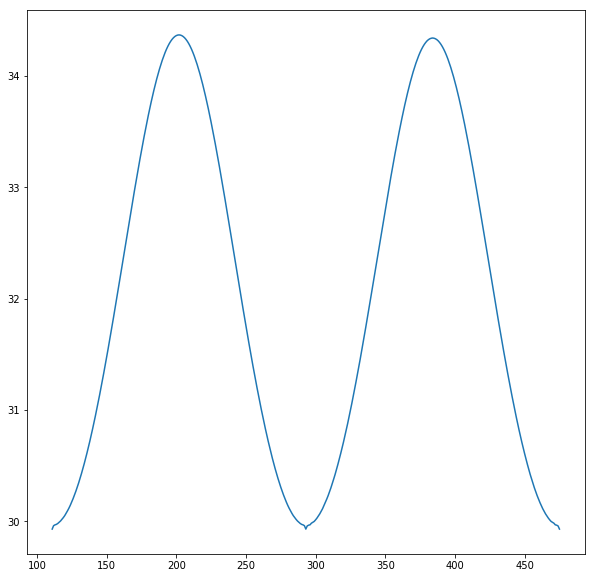

In [536]:
plt.plot(np.arange(365) + (31 + 28 + 31 + 21), time_diffs)

In [519]:
c.subs({alpha:0, beta:0, gamma:0})

0

In [547]:
time_diffs2 = [get_time_diff(0, gv, 10) for gv in gamma_vals]

1.0000015696123057 0.0 -64.56666666666666
1.0000015696123057 0.0 -63.26228956228956
1.0000015696123057 0.0 -61.957912457912464
1.0000015696123057 0.0 -60.65353535353536
1.0000015696123057 0.0 -59.34915824915824
1.0000015696123057 0.0 -58.04478114478114
1.0000015696123057 0.0 -56.74040404040404
1.0000015696123057 0.0 -55.436026936026934
1.0000015696123057 0.0 -54.13164983164984
1.0000015696123057 0.0 -52.827272727272735
1.0000015696123057 0.0 -51.52289562289562
1.0000015696123057 0.0 -50.21851851851852
1.0000015696123057 0.0 -48.91414141414141
1.0000015696123057 0.0 -47.6097643097643
1.0000015696123057 0.0 -46.30538720538721
1.0000015696123057 0.0 -45.0010101010101
1.0000015696123057 0.0 -43.696632996633
1.0000015696123057 0.0 -42.39225589225589
1.0000015696123057 0.0 -41.08787878787879
1.0000015696123057 0.0 -39.78350168350168
1.0000015696123057 0.0 -38.47912457912458
1.0000015696123057 0.0 -37.17474747474747
1.0000015696123057 0.0 -35.870370370370374
1.0000015696123057 0.0 -34.5659932

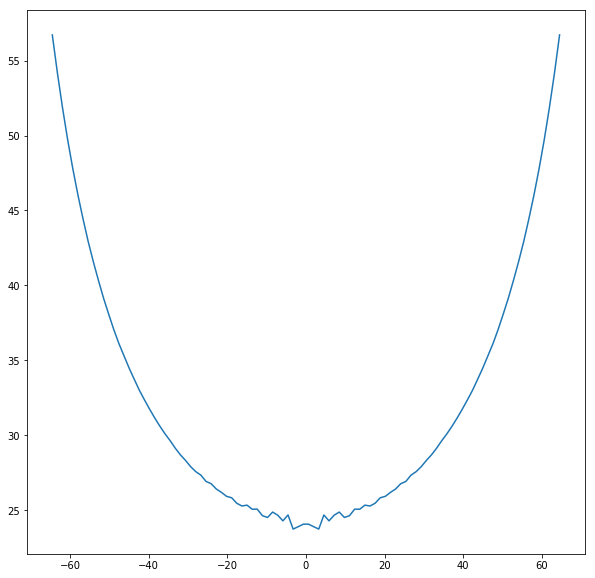

In [546]:
plt.plot(gamma_vals / np.pi * 180, time_diffs2)